# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import xgboost as xgb
from scipy.stats import kstest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from xgboost import XGBClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import lightgbm as lgbm
import missingno as msno
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve, auc
import pandas_profiling
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore') #忽略提示的警告
import matplotlib as mpl
%matplotlib inline
#图例中显示中文
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

C:\Users\tianyunguanggao\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Preprocessing

In [2]:
#读取数据，且利用gb2312对表格中的中文字符解码
Data = pd.read_csv('D:/数据科学算法/期末论文/Driver_Test.csv', encoding = 'gb2312')
Data_Raw = Data.copy()   #对原数据进行拷贝，保留读取的原数据
Data.head()

,测试人员编号,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,...,二阶段脚反应错误次数,二阶段的车辆行驶出现违法错误,三阶段脚反应平均时间,三阶段脚反应最短时间,三阶段脚反应标准差,三阶段手反应平均时间,三阶段手反应最短时间,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数
0,0,1.10,0.83,0.21,1.19,0.68,0.70,1,0,0.86,...,0,9,1.13,1.03,0.14,1.94,1.03,0.86,1,0
1,1,1.22,0.80,0.37,0.91,0.60,0.32,0,0,0.92,...,0,2,1.14,1.11,0.05,1.02,0.76,0.40,0,0
2,2,1.59,0.89,0.55,0.98,0.64,0.32,2,0,1.22,...,1,6,1.33,1.19,0.20,1.37,0.88,0.31,1,0
3,3,1.35,0.83,0.31,1.28,0.66,0.85,1,0,1.07,...,0,12,1.49,1.26,0.32,2.32,1.61,0.81,1,0
4,4,1.12,0.69,0.37,0.83,0.62,0.18,2,0,0.81,...,1,5,0.96,0.85,0.12,0.90,0.78,0.22,0,0


In [3]:
#观察数据每一列的数据类型，可以看到基本都是浮点型或者是整型数据，均属于定量变量
Data.dtypes

测试人员编号              int64
脚反应平均时间           float64
脚反应最短时间           float64
脚反应时间标准差          float64
手反应平均时间           float64
手反应最短时间           float64
手反应时间标准差          float64
脚反应错误次数             int64
手反应错误次数             int64
一阶段脚反应平均时间        float64
一阶段脚反应最短时间        float64
一阶段脚反应标准差         float64
一阶段手反应平均时间        float64
一阶段手反应最短时间        float64
一阶段手反应时间标准差       float64
一阶段脚反应错误次数          int64
一阶段手反应错误次数          int64
二阶段脚反应平均时间        float64
二阶段脚反应最短时间        float64
二阶段脚反应标准差         float64
二阶段脚反应错误次数          int64
二阶段的车辆行驶出现违法错误      int64
三阶段脚反应平均时间        float64
三阶段脚反应最短时间        float64
三阶段脚反应标准差         float64
三阶段手反应平均时间        float64
三阶段手反应最短时间        float64
三阶段手反应时间标准差       float64
三阶段脚反应错误次数          int64
三阶段手反应错误次数          int64
dtype: object

### 每一个变量都属于负相关的评价标准，也就是说脚/手反应平均时间越短，最短时间越短，标准差越小（反映反应时间的波动），反应错误次数越少，测试人员的反应能力要强。

In [4]:
#对原数据进行描述性统计
g = Data.describe()
g.to_csv('D:/数据科学算法/期末论文/描述性统计.csv', encoding = 'gb2312')
g

,测试人员编号,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,...,二阶段脚反应错误次数,二阶段的车辆行驶出现违法错误,三阶段脚反应平均时间,三阶段脚反应最短时间,三阶段脚反应标准差,三阶段手反应平均时间,三阶段手反应最短时间,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,20.000000,1.248780,0.809756,0.366585,1.056585,0.701951,0.370976,2.024390,0.170732,0.966341,...,1.219512,10.170732,1.221463,1.094634,0.154634,1.295366,0.993415,0.338537,0.463415,0.097561
std,11.979149,0.169103,0.122035,0.154800,0.260573,0.160362,0.190903,2.196449,0.543251,0.151059,...,1.890928,15.011500,0.216617,0.175087,0.122782,0.332326,0.230224,0.203292,0.595716,0.374492
min,0.000000,0.950000,0.690000,0.050000,0.730000,0.510000,0.100000,0.000000,0.000000,0.770000,...,0.000000,1.000000,0.820000,0.730000,0.000000,0.820000,0.680000,0.080000,0.000000,0.000000
25%,10.000000,1.130000,0.720000,0.280000,0.890000,0.620000,0.240000,0.000000,0.000000,0.850000,...,0.000000,3.000000,1.070000,0.950000,0.070000,1.120000,0.840000,0.180000,0.000000,0.000000
50%,20.000000,1.240000,0.800000,0.350000,0.960000,0.670000,0.320000,2.000000,0.000000,0.920000,...,1.000000,5.000000,1.220000,1.090000,0.120000,1.220000,0.940000,0.290000,0.000000,0.000000
75%,30.000000,1.370000,0.880000,0.440000,1.190000,0.720000,0.410000,3.000000,0.000000,1.020000,...,1.000000,9.000000,1.320000,1.190000,0.210000,1.390000,1.090000,0.450000,1.000000,0.000000
max,40.000000,1.600000,1.280000,0.780000,2.090000,1.500000,0.890000,10.000000,3.000000,1.450000,...,8.000000,84.000000,1.940000,1.510000,0.550000,2.320000,1.610000,0.860000,2.000000,2.000000


In [5]:
#将测试人员编号设置为DataFrame的索引列
Data.set_index("测试人员编号", inplace=True)

https://blog.csdn.net/weixin_41698730/article/details/116335175

In [6]:
#生成网页版数据分析报告，joblib==0.13.2，1.0.1
pfr = pandas_profiling.ProfileReport(Data, title = '驾驶人员数据分析报告')
pfr.to_file('D:/数据科学算法/期末论文/驾驶人员数据分析报告.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

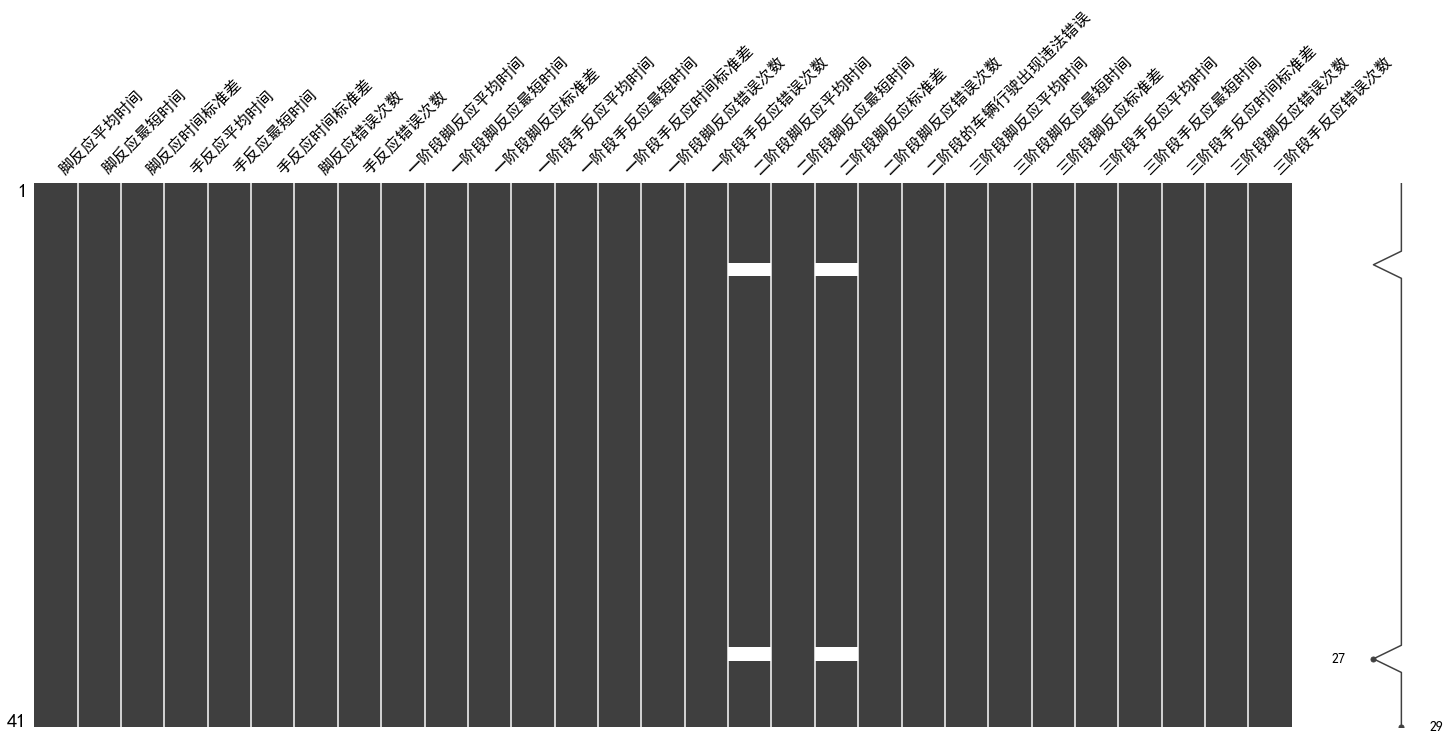

In [6]:
#missingno库主要用于对缺失值的展示,这里利用msno.matrix函数对原数据各列中的缺失值进行可视化展示
msno.matrix(Data)

In [7]:
print(Data.isnull().any(axis=1))
#可以看到第六号和第三十五号测试人员存在空值

测试人员编号
0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35     True
36    False
37    False
38    False
39    False
40    False
dtype: bool


In [8]:
#统计数据中的每一列是否存在缺失值，可以确定第35和第6号测试人员在二阶段脚反应标准差和二阶段脚反应标准差上缺少数据
Data.isnull().sum()
#前六个指标项为整体评价指标项，可以用于加分；手/脚反应错误次数用于减分 —— 一共8个指标项
#第一阶段指标项共有8个，为无干扰反应能力测试
#第二阶段指标项共有5个，为人工驾驶情况下反应能力测试
#第三阶段指标项共有8个，为自动驾驶情况下反应能力测试

脚反应平均时间           0
脚反应最短时间           0
脚反应时间标准差          0
手反应平均时间           0
手反应最短时间           0
手反应时间标准差          0
脚反应错误次数           0
手反应错误次数           0
一阶段脚反应平均时间        0
一阶段脚反应最短时间        0
一阶段脚反应标准差         0
一阶段手反应平均时间        0
一阶段手反应最短时间        0
一阶段手反应时间标准差       0
一阶段脚反应错误次数        0
一阶段手反应错误次数        0
二阶段脚反应平均时间        2
二阶段脚反应最短时间        0
二阶段脚反应标准差         2
二阶段脚反应错误次数        0
二阶段的车辆行驶出现违法错误    0
三阶段脚反应平均时间        0
三阶段脚反应最短时间        0
三阶段脚反应标准差         0
三阶段手反应平均时间        0
三阶段手反应最短时间        0
三阶段手反应时间标准差       0
三阶段脚反应错误次数        0
三阶段手反应错误次数        0
dtype: int64

### Dealing with the NaN value, and fill them with mean

In [9]:
mean_val = Data['二阶段脚反应平均时间'].mean()
Data['二阶段脚反应平均时间'].fillna(mean_val, inplace=True)  #利用均值填充'二阶段脚反应平均时间'和'二阶段脚反应标准差'两列的缺失值
mean_val1 = Data['二阶段脚反应标准差'].mean()
Data['二阶段脚反应标准差'].fillna(mean_val1, inplace=True)  

In [10]:
Data.isnull().sum()   #可以看到各列中缺失值已被去除

脚反应平均时间           0
脚反应最短时间           0
脚反应时间标准差          0
手反应平均时间           0
手反应最短时间           0
手反应时间标准差          0
脚反应错误次数           0
手反应错误次数           0
一阶段脚反应平均时间        0
一阶段脚反应最短时间        0
一阶段脚反应标准差         0
一阶段手反应平均时间        0
一阶段手反应最短时间        0
一阶段手反应时间标准差       0
一阶段脚反应错误次数        0
一阶段手反应错误次数        0
二阶段脚反应平均时间        0
二阶段脚反应最短时间        0
二阶段脚反应标准差         0
二阶段脚反应错误次数        0
二阶段的车辆行驶出现违法错误    0
三阶段脚反应平均时间        0
三阶段脚反应最短时间        0
三阶段脚反应标准差         0
三阶段手反应平均时间        0
三阶段手反应最短时间        0
三阶段手反应时间标准差       0
三阶段脚反应错误次数        0
三阶段手反应错误次数        0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

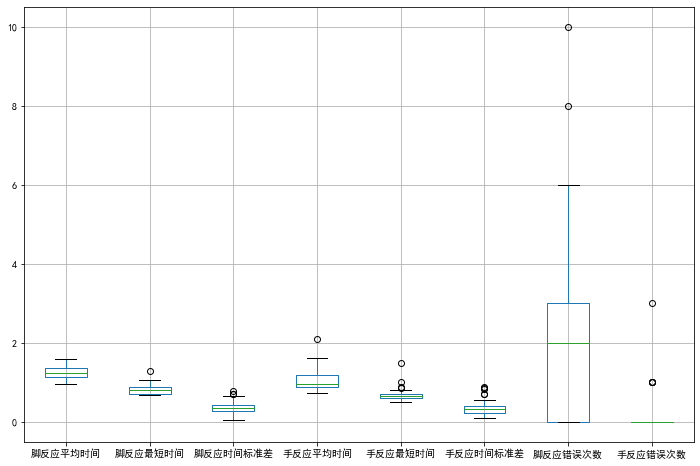

In [11]:
#对前八项指标进行箱线图绘制，用来检测是否存在异常值
plt.figure(figsize = (12,8))
Data.boxplot(column = ['脚反应平均时间','脚反应最短时间','脚反应时间标准差','手反应平均时间','手反应最短时间','手反应时间标准差','脚反应错误次数','手反应错误次数'])

In [12]:
#三倍标准差检验每列中的异常值
Feature_first_batch  = Data.iloc[:,0:8]
a = Feature_first_batch[abs(Feature_first_batch - Feature_first_batch.mean()) > 3*Feature_first_batch.std()]
a

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数
测试人员编号,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.28,NaN,2.09,1.5,NaN,NaN,3.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


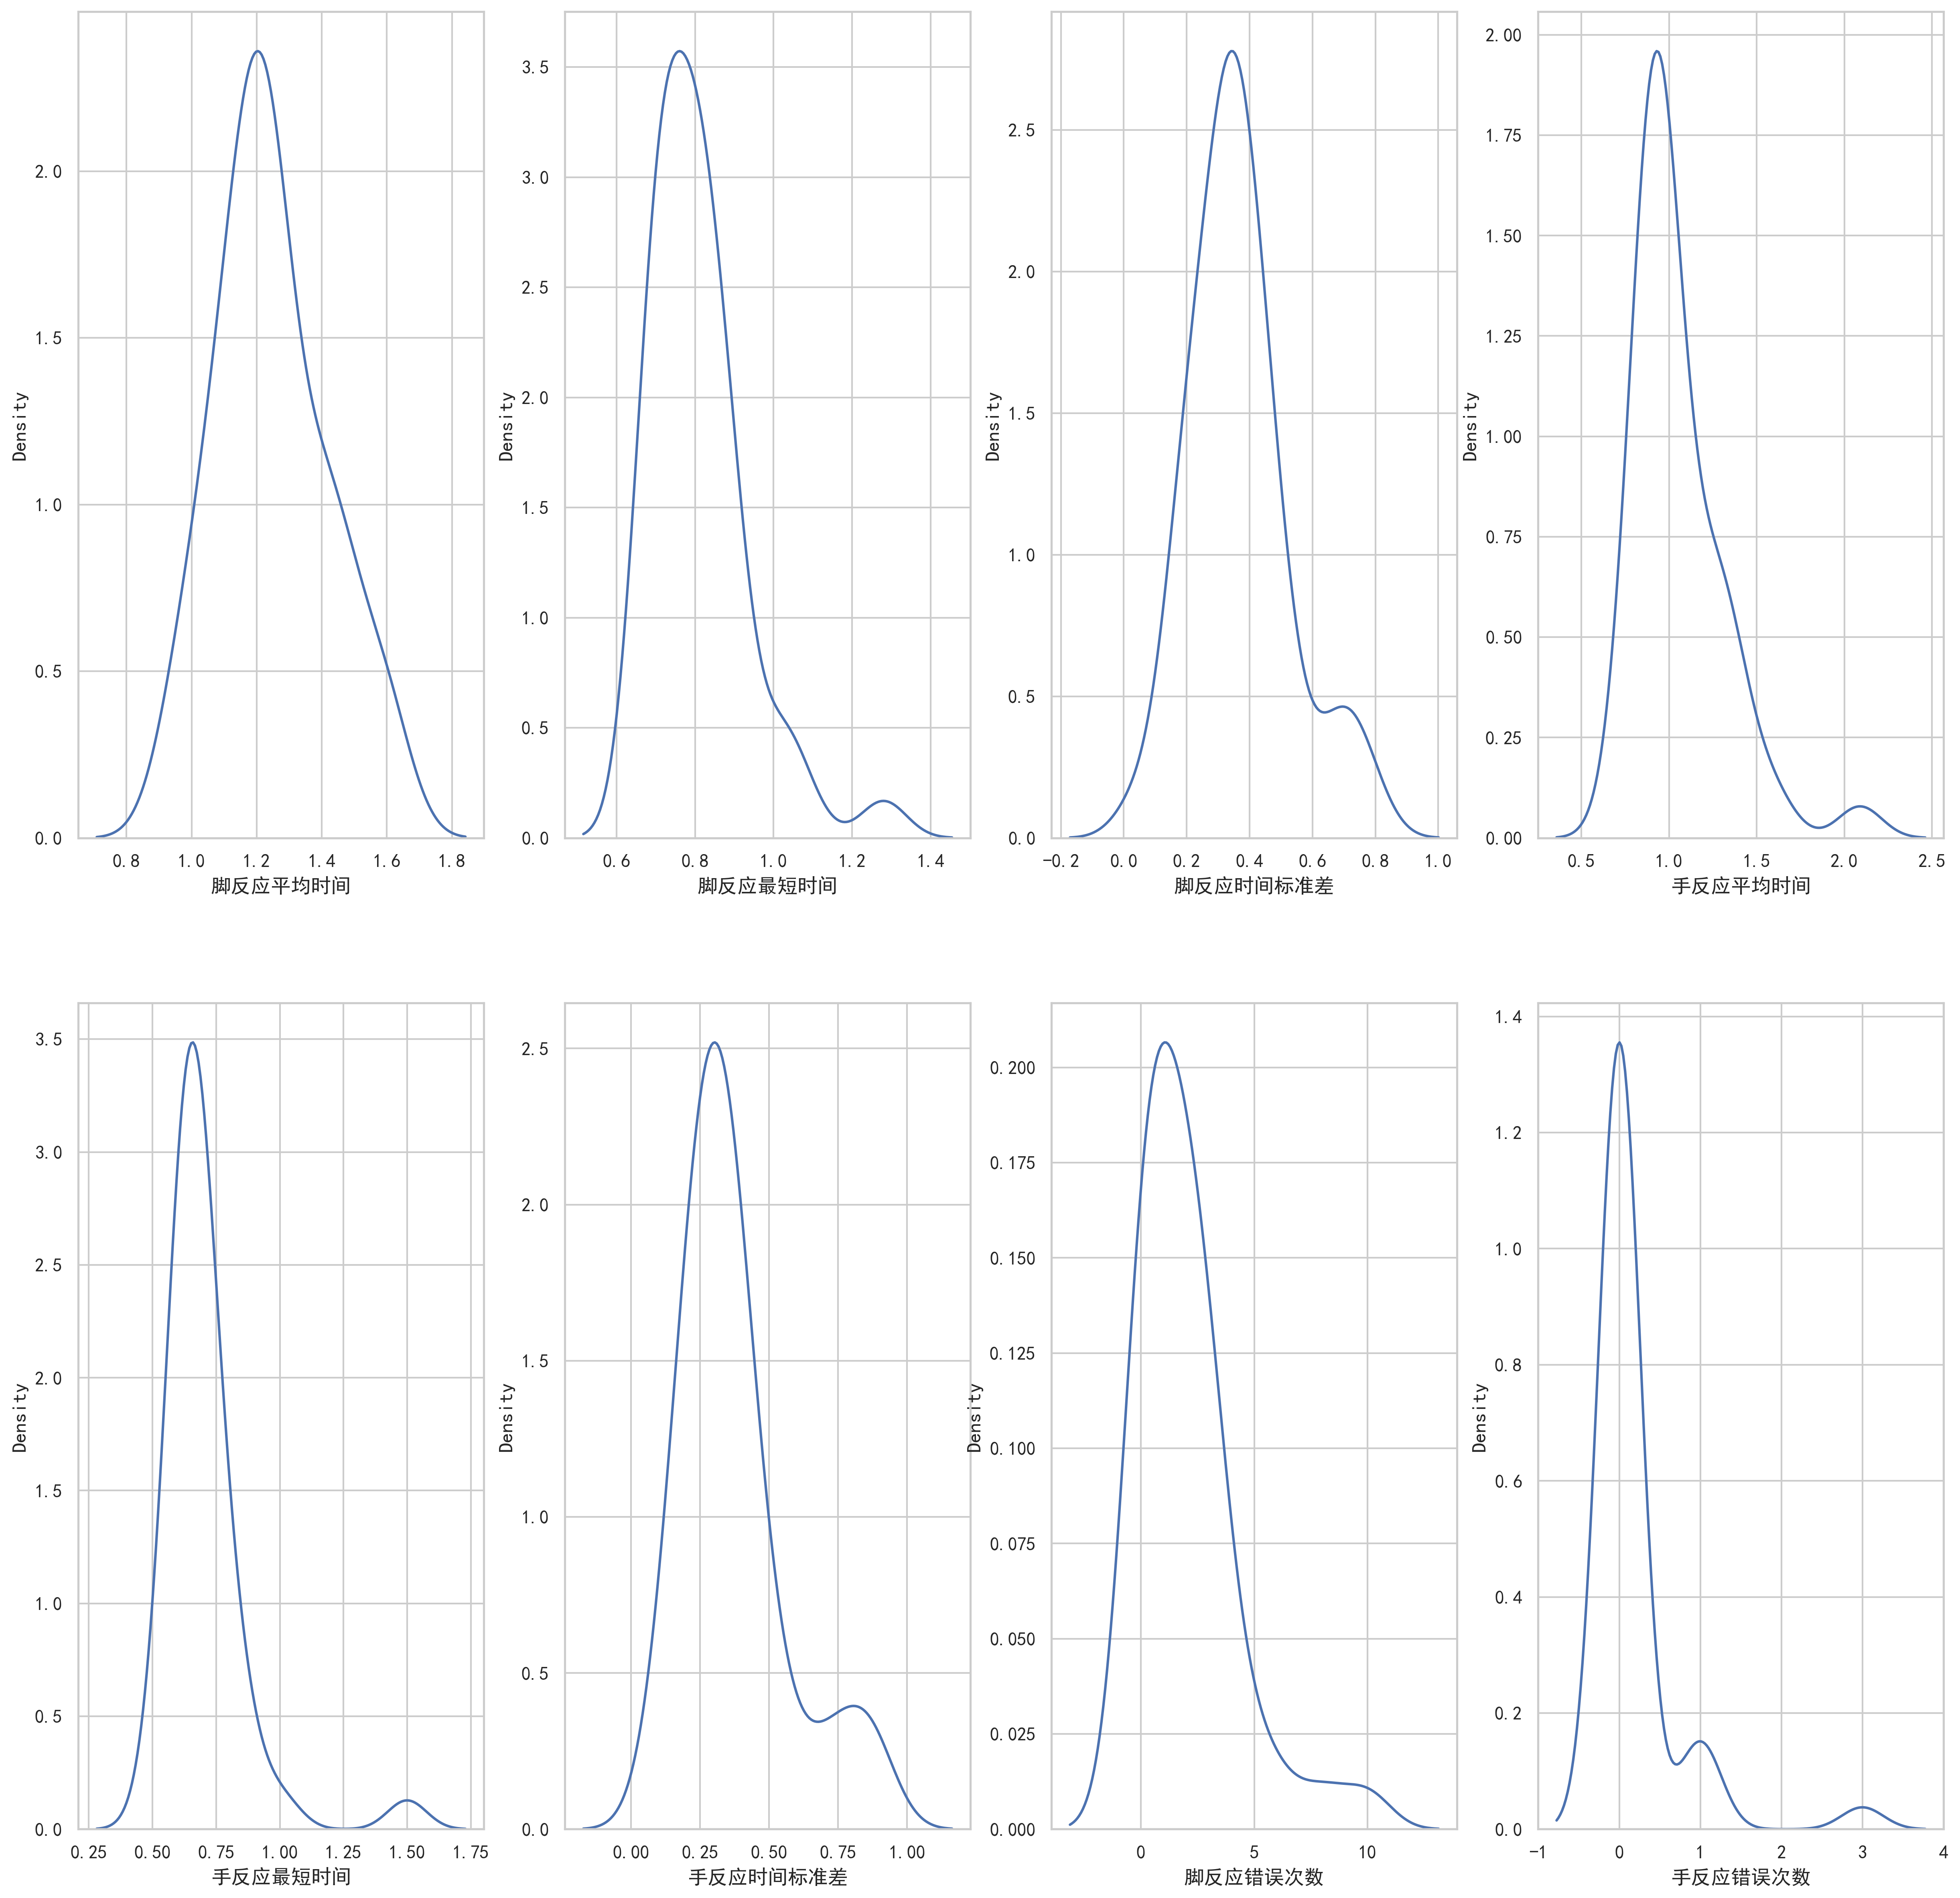

In [13]:
sns.set(context='notebook',font='simhei',style='whitegrid')
plt.figure(figsize=(20,20),dpi=300)
plt.subplot(2,4,1)
sns.kdeplot(Data['脚反应平均时间'])
plt.subplot(2,4,2)
sns.kdeplot(Data['脚反应最短时间'])
plt.subplot(2,4,3)
sns.kdeplot(Data['脚反应时间标准差'])
plt.subplot(2,4,4)
sns.kdeplot(Data['手反应平均时间'])
plt.subplot(2,4,5)
sns.kdeplot(Data['手反应最短时间'])
plt.subplot(2,4,6)
sns.kdeplot(Data['手反应时间标准差'])
plt.subplot(2,4,7)
sns.kdeplot(Data['脚反应错误次数'])
plt.subplot(2,4,8)
sns.kdeplot(Data['手反应错误次数'])
plt.show()

In [14]:
#KS检验用来判断数据是否符合正态分布，输出结果中第一个为统计数，第二个为P值
First_Features = ['脚反应平均时间','脚反应最短时间','脚反应时间标准差','手反应平均时间','手反应最短时间','手反应时间标准差','脚反应错误次数','手反应错误次数']
for i in First_Features:
    print('{}正态性检验结果为：{}'.format(i, kstest(Data[i], 'norm')))

脚反应平均时间正态性检验结果为：KstestResult(statistic=0.8289438736915182, pvalue=1.0608527827430408e-31)
脚反应最短时间正态性检验结果为：KstestResult(statistic=0.7549029063256906, pvalue=9.135980362288638e-25)
脚反应时间标准差正态性检验结果为：KstestResult(statistic=0.5470334719984616, pvalue=4.872813692014662e-12)
手反应平均时间正态性检验结果为：KstestResult(statistic=0.7673049076991025, pvalue=8.51306172638856e-26)
手反应最短时间正态性检验结果为：KstestResult(statistic=0.6949742691024806, pvalue=2.5555333956251682e-20)
手反应时间标准差正态性检验结果为：KstestResult(statistic=0.539827837277029, pvalue=1.037084028069539e-11)
脚反应错误次数正态性检验结果为：KstestResult(statistic=0.5730520631417136, pvalue=2.829822365348756e-13)
手反应错误次数正态性检验结果为：KstestResult(statistic=0.5, pvalue=5.288970392663024e-10)


从得到的结果来看，每一列kstest所得到的p值都小于0.05，拒绝原数据为高斯分布的零假设，因此认为前八个指标项数据分布都不属于正态分布

In [15]:
#计算脚反应错误次数的频数分布
Data['脚反应错误次数'].value_counts()

0     11
1      9
2      8
3      7
4      2
5      1
6      1
8      1
10     1
Name: 脚反应错误次数, dtype: int64

In [16]:
#计算手反应错误次数的频数分布
Data['手反应错误次数'].value_counts()

0    36
1     4
3     1
Name: 手反应错误次数, dtype: int64

(array([36.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

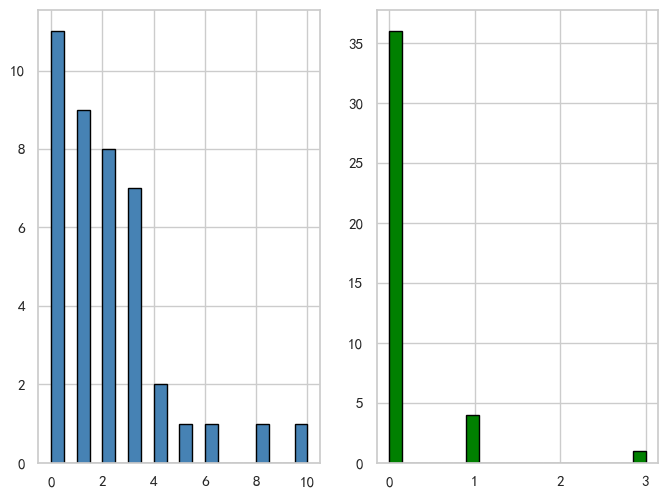

In [17]:
#绘制脚反应错误次数和手反应错误次数的频数分布直方图
plt.figure(figsize=(8,6),dpi=100)
plt.subplot(121)
plt.hist(x = Data.脚反应错误次数, # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )
plt.subplot(122)
plt.hist(x = Data.手反应错误次数, # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'green', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

总体来看，脚反应错误次数要比手反应错误次数总量要多，且脚反应错误的分布样本点很多，从1次到10次不等；相比来说，手反应错误的次数较少，测试人员中仅有四次出现1次错误，仅有1人出现三次错误。

<AxesSubplot:xlabel='手反应平均时间', ylabel='Density'>

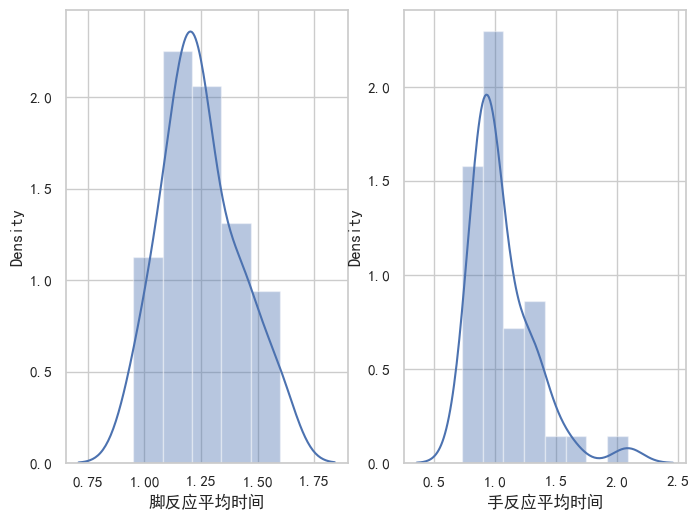

In [18]:
plt.figure(figsize=(8,6),dpi=100)
plt.subplot(121)
sns.distplot(Data['脚反应平均时间'])
plt.subplot(122)
sns.distplot(Data['手反应平均时间'])

In [19]:
def coefficient_of_variation(data):   #计算变异系数，用于衡量数据的离散程度
    mean=np.mean(data)       #计算平均值
    std=np.std(data,ddof=0)  #计算标准差
    cv=std/mean
    return cv

In [20]:
#计算定量变量的标准差系数，也就是计算标准差除以均值，先计算各定量变量的标准差，再计算各定量变量的均值
list1 = []
for k in First_Features:
    a0=Data[k].mean()
    b0=Data[k].std()
    list1.append(b0/a0)
    print("{}的标准差系数:{}".format(k,b0/a0))                                  #求出标准差系数
    print("{}的标准差:{}".format(k,b0))                                        #求出标准差
    print("{}的均值:{}".format(k,a0))                                         #求出均值
    print("{}的偏度:{}".format(k,Data[k].skew()))                             #求出偏度
    print("{}的峰度:{}".format(k,Data[k].kurt()))                             #求出峰度
    print('{}的变异系数：{}'.format(k,coefficient_of_variation(Data[k])))     #求出变异系数
    print("--------------------------------------------")
    
obj1 = pd.Series(list1,index = ['脚反应平均时间','脚反应最短时间','脚反应时间标准差','手反应平均时间','手反应最短时间','手反应时间标准差','脚反应错误次数','手反应错误次数'])
print("从大到小的标准差系数排序：\n", obj1.sort_values(ascending=False))

脚反应平均时间的标准差系数:0.1354148692476365
脚反应平均时间的标准差:0.16910344647509729
脚反应平均时间的均值:1.248780487804878
脚反应平均时间的偏度:0.4165506993606971
脚反应平均时间的峰度:-0.3298765880515129
脚反应平均时间的变异系数：0.13375327418232494
--------------------------------------------
脚反应最短时间的标准差系数:0.15070535638079965
脚反应最短时间的标准差:0.12203458126445244
脚反应最短时间的均值:0.8097560975609759
脚反应最短时间的偏度:1.791289169321232
脚反应最短时间的峰度:4.550781607129801
脚反应最短时间的变异系数：0.14885614087093987
--------------------------------------------
脚反应时间标准差的标准差系数:0.4222755264664398
脚反应时间标准差的标准差:0.15480002836074613
脚反应时间标准差的均值:0.36658536585365864
脚反应时间标准差的偏度:0.8027891663026494
脚反应时间标准差的峰度:0.9292797205864081
脚反应时间标准差的变异系数：0.41709403543168966
--------------------------------------------
手反应平均时间的标准差系数:0.24661759358352014
手反应平均时间的标准差:0.2605725403423926
手反应平均时间的均值:1.0565853658536588
手反应平均时间的偏度:1.957269959844912
手反应平均时间的峰度:5.155612239363487
手反应平均时间的变异系数：0.24359149623694282
--------------------------------------------
手反应最短时间的标准差系数:0.2284523340297185
手反应最短时间的标准差:0.1603623944725683


### 标准差系数是将标准差与相应的平均数对比的结果，是反映标志变动度的绝对指标。它的大小，不仅取决于标准值的离差程度，还决定于数列平均水平的高低。标准差系数越大，变量可能越重要。由此，从标准差系数上来看，手反应错误次数>脚反应错误次数>手反应时间标准差>脚反应时间标准差>手反应平均时间>手反应最短时间>脚反应最短时间>脚反应平均时间

In [21]:
#skewness and kurtosis (偏度和峰度)
print("Feet Reaction Time's Skewness: %f" % Data['脚反应平均时间'].skew())
print("Feet Reaction Time's Kurtosis: %f" % Data['脚反应平均时间'].kurt())

Feet Reaction Time's Skewness: 0.416551
Feet Reaction Time's Kurtosis: -0.329877


In [22]:
print("Hands Reaction Time's Skewness: %f" % Data['手反应平均时间'].skew())
print("Hands Reaction Time's Kurtosis: %f" % Data['手反应平均时间'].kurt())

Hands Reaction Time's Skewness: 1.957270
Hands Reaction Time's Kurtosis: 5.155612


In [23]:
Data[['脚反应平均时间', '手反应平均时间']].corr(method='pearson')   #计算皮尔逊相关系数
#可以看到脚反应平均时间与手反应平均时间的相关系数在0.4左右，相关性不是很高

,脚反应平均时间,手反应平均时间
脚反应平均时间,1.000000,0.395183
手反应平均时间,0.395183,1.000000


### 对前八项指标(总体衡量指标)计算皮尔逊相关系数矩阵

In [24]:
Person_corr = Data[['脚反应平均时间', '脚反应最短时间', '脚反应时间标准差', '手反应平均时间', '手反应最短时间','手反应时间标准差','脚反应错误次数','手反应错误次数']].corr(method='pearson')
Person_corr

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数
脚反应平均时间,1.000000,0.638297,0.665492,0.395183,0.355207,0.271548,-0.030206,0.301673
脚反应最短时间,0.638297,1.000000,0.094841,0.471688,0.530563,0.259381,0.405742,0.547439
脚反应时间标准差,0.665492,0.094841,1.000000,0.220409,0.125859,0.216600,-0.207096,0.054671
手反应平均时间,0.395183,0.471688,0.220409,1.000000,0.808567,0.776241,0.208506,0.652373
手反应最短时间,0.355207,0.530563,0.125859,0.808567,1.000000,0.379342,0.340550,0.673330
手反应时间标准差,0.271548,0.259381,0.216600,0.776241,0.379342,1.000000,0.017232,0.340660
脚反应错误次数,-0.030206,0.405742,-0.207096,0.208506,0.340550,0.017232,1.000000,0.436407
手反应错误次数,0.301673,0.547439,0.054671,0.652373,0.673330,0.340660,0.436407,1.000000


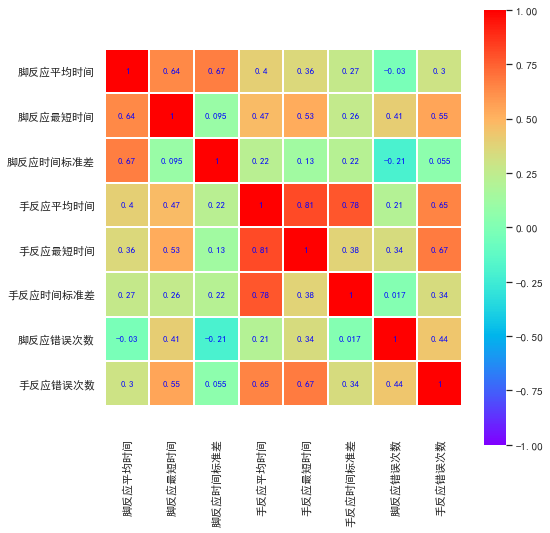

In [25]:
#绘制前八个变量皮尔逊相关系数矩阵的热力图
plt.subplots(figsize = (8,8))
sns.heatmap(Person_corr, annot=True, vmax=1, vmin=-1,square=True, cmap='rainbow', linewidths=0.2,annot_kws={'size':9,'weight':'bold', 'color':'blue'})
bottom,top=plt.ylim()
plt.ylim(bottom+0.5,top-0.5)
plt.show()

### 对第一阶段的八项指标(无干扰反应能力测试阶段)计算皮尔逊相关系数矩阵

In [26]:
Person_corr_Second = Data.iloc[:,8:16].corr(method='pearson')
Person_corr_Second

,一阶段脚反应平均时间,一阶段脚反应最短时间,一阶段脚反应标准差,一阶段手反应平均时间,一阶段手反应最短时间,一阶段手反应时间标准差,一阶段脚反应错误次数,一阶段手反应错误次数
一阶段脚反应平均时间,1.000000,0.793870,0.450828,0.609700,0.537266,0.547448,-0.174037,0.383519
一阶段脚反应最短时间,0.793870,1.000000,-0.084365,0.517120,0.548213,0.330097,0.043563,0.374261
一阶段脚反应标准差,0.450828,-0.084365,1.000000,0.139722,-0.010688,0.403046,-0.236865,-0.006074
一阶段手反应平均时间,0.609700,0.517120,0.139722,1.000000,0.851416,0.808851,-0.143972,0.731212
一阶段手反应最短时间,0.537266,0.548213,-0.010688,0.851416,1.000000,0.474317,-0.163673,0.481404
一阶段手反应时间标准差,0.547448,0.330097,0.403046,0.808851,0.474317,1.000000,-0.052592,0.609682
一阶段脚反应错误次数,-0.174037,0.043563,-0.236865,-0.143972,-0.163673,-0.052592,1.000000,-0.113650
一阶段手反应错误次数,0.383519,0.374261,-0.006074,0.731212,0.481404,0.609682,-0.113650,1.000000


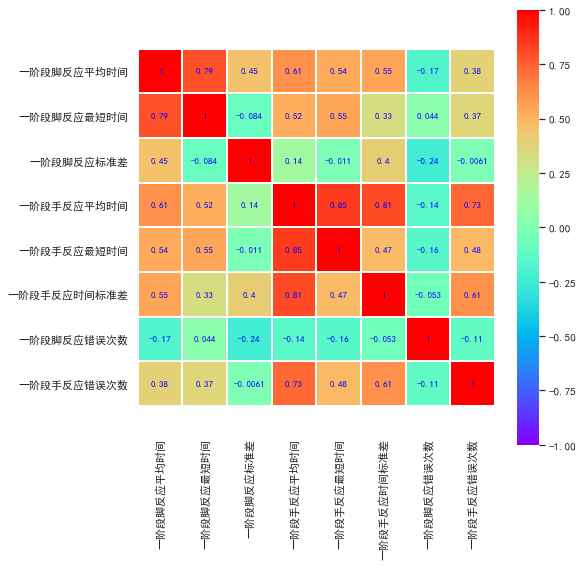

In [27]:
#绘制前八个变量皮尔逊相关系数矩阵的热力图
plt.subplots(figsize = (8,8))
sns.heatmap(Person_corr_Second, annot=True, vmax=1, vmin=-1,square=True, cmap='rainbow', linewidths=0.2,annot_kws={'size':9,'weight':'bold', 'color':'blue'})
bottom,top=plt.ylim()
plt.ylim(bottom+0.5,top-0.5)
plt.show()

### 对第二阶段的五项指标(人工驾驶情况下反应能力测试阶段)计算皮尔逊相关系数矩阵

In [28]:
Person_corr_Third = Data.iloc[:,16:21].corr(method='pearson')
Person_corr_Third

,二阶段脚反应平均时间,二阶段脚反应最短时间,二阶段脚反应标准差,二阶段脚反应错误次数,二阶段的车辆行驶出现违法错误
二阶段脚反应平均时间,1.000000,0.179646,0.657957,0.018915,-0.216871
二阶段脚反应最短时间,0.179646,1.000000,0.040888,0.799989,0.284129
二阶段脚反应标准差,0.657957,0.040888,1.000000,-0.011107,-0.215723
二阶段脚反应错误次数,0.018915,0.799989,-0.011107,1.000000,0.304259
二阶段的车辆行驶出现违法错误,-0.216871,0.284129,-0.215723,0.304259,1.000000


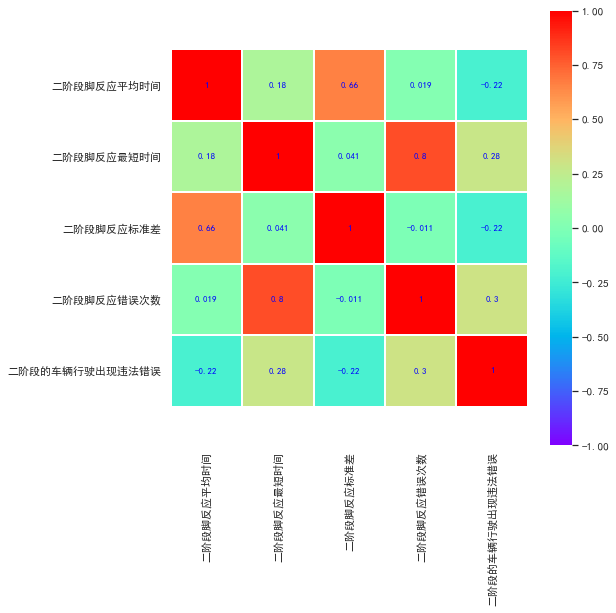

In [29]:
#绘制前八个变量皮尔逊相关系数矩阵的热力图
plt.subplots(figsize = (8,8))
sns.heatmap(Person_corr_Third, annot=True, vmax=1, vmin=-1,square=True, cmap='rainbow', linewidths=0.2,annot_kws={'size':9,'weight':'bold', 'color':'blue'})
bottom,top=plt.ylim()
plt.ylim(bottom+0.5,top-0.5)
plt.show()

### 对第三阶段的八项指标(自动驾驶模式下反应能力测试阶段)计算皮尔逊相关系数矩阵

In [30]:
Person_corr_Fourth = Data.iloc[:,21::].corr(method='pearson')
Person_corr_Fourth

,三阶段脚反应平均时间,三阶段脚反应最短时间,三阶段脚反应标准差,三阶段手反应平均时间,三阶段手反应最短时间,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数
三阶段脚反应平均时间,1.000000,0.886723,0.598779,0.382907,0.481596,0.068970,-0.077069,0.398831
三阶段脚反应最短时间,0.886723,1.000000,0.194230,0.294564,0.402359,0.037772,0.048405,0.248390
三阶段脚反应标准差,0.598779,0.194230,1.000000,0.274718,0.278281,0.059672,-0.132633,0.316144
三阶段手反应平均时间,0.382907,0.294564,0.274718,1.000000,0.841220,0.668421,0.078048,0.190541
三阶段手反应最短时间,0.481596,0.402359,0.278281,0.841220,1.000000,0.231506,0.008225,0.303404
三阶段手反应时间标准差,0.068970,0.037772,0.059672,0.668421,0.231506,1.000000,-0.019032,-0.053902
三阶段脚反应错误次数,-0.077069,0.048405,-0.132633,0.078048,0.008225,-0.019032,1.000000,0.128461
三阶段手反应错误次数,0.398831,0.248390,0.316144,0.190541,0.303404,-0.053902,0.128461,1.000000


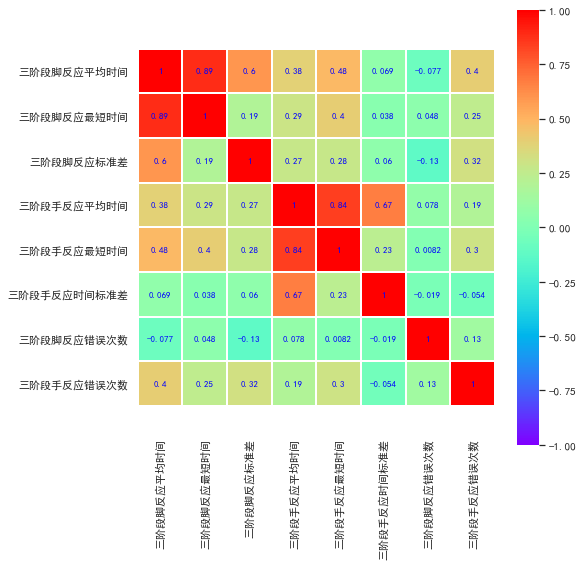

In [31]:
#绘制前八个变量皮尔逊相关系数矩阵的热力图
plt.subplots(figsize = (8,8))
sns.heatmap(Person_corr_Fourth, annot=True, vmax=1, vmin=-1,square=True, cmap='rainbow', linewidths=0.2,annot_kws={'size':9,'weight':'bold', 'color':'blue'})
bottom,top=plt.ylim()
plt.ylim(bottom+0.5,top-0.5)
plt.show()

### 观察整体指标的相关关系

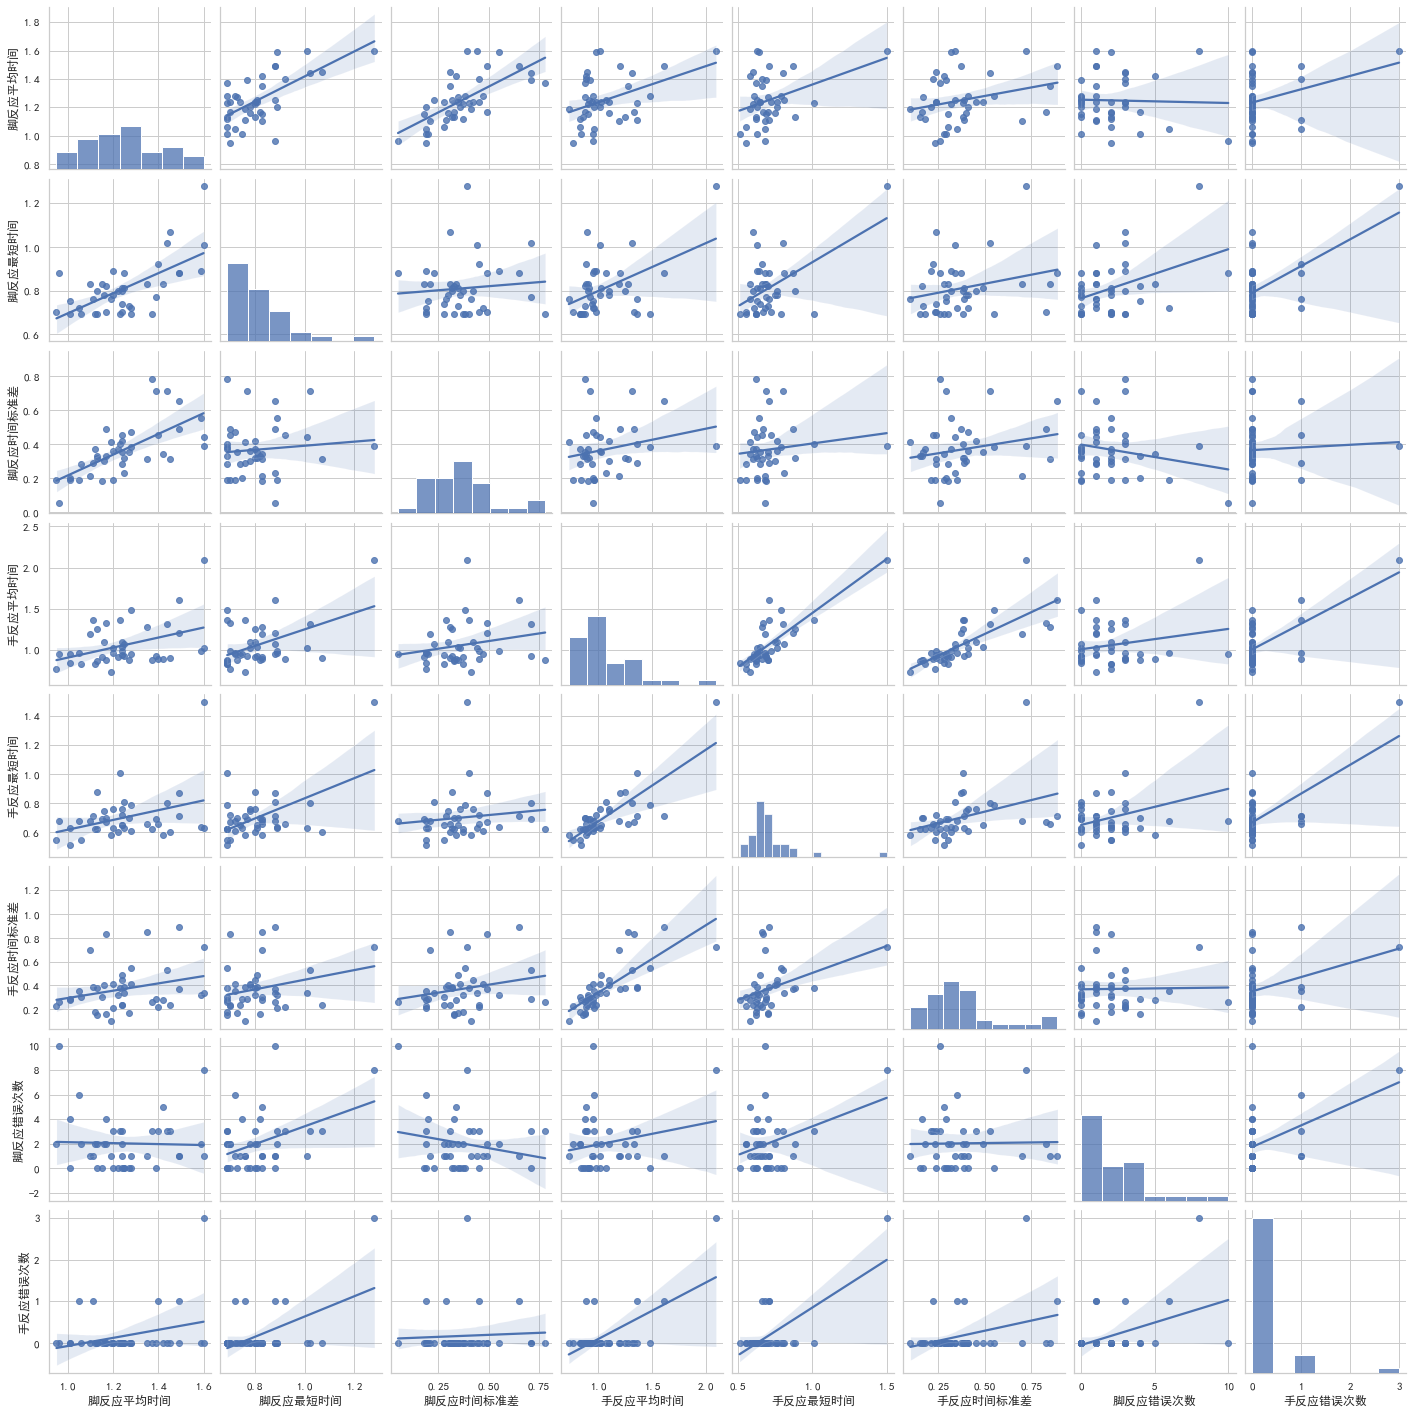

In [32]:
#绘制前八个变量之间的相关关系图
sns.pairplot(Data[['脚反应平均时间', '脚反应最短时间', '脚反应时间标准差', '手反应平均时间', '手反应最短时间','手反应时间标准差','脚反应错误次数','手反应错误次数']], kind='reg')
plt.savefig("D:/数据科学算法/期末论文/整体指标变量相关关系.png")
plt.show()

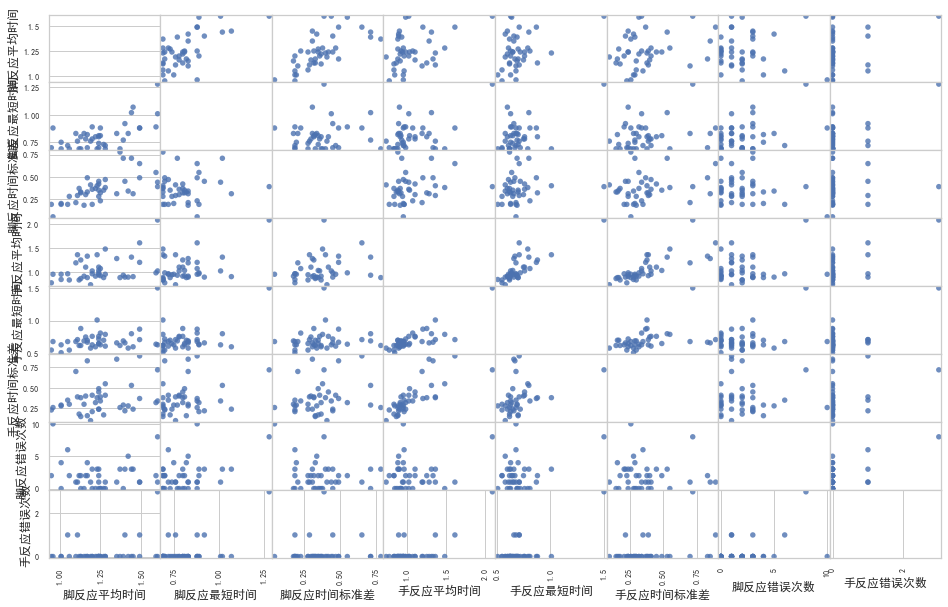

In [33]:
#绘制散点图
pd.plotting.scatter_matrix(Data.iloc[:,0:8],figsize=(16,10),marker = 'o', diagonal = ' ', s=30, alpha = 0.8) 
plt.show()

In [34]:
#将手平均反应时间一列平均分为5组，单纯从手反应平均时间来看
Hands_Mean_Reaction_Time_Group = pd.cut(Data['手反应平均时间'], 5, precision = 2)
pd.value_counts(Hands_Mean_Reaction_Time_Group)

(0.73, 1.0]     24
(1.0, 1.27]      9
(1.27, 1.55]     6
(1.55, 1.82]     1
(1.82, 2.09]     1
Name: 手反应平均时间, dtype: int64

In [35]:
#有27个人手反应平均时间超过测试人员手反应平均时间的均值
Data['手反应平均时间'][Data['手反应平均时间'] < Data['手反应平均时间'].mean()]

测试人员编号
1     0.91
2     0.98
4     0.83
5     0.96
7     0.89
8     0.84
9     0.89
10    0.73
11    0.96
12    0.88
14    1.02
15    0.88
16    0.83
19    0.95
20    0.92
21    1.02
22    0.95
25    0.86
27    1.03
30    0.90
31    0.93
34    0.77
35    0.95
36    0.88
37    0.94
38    0.91
40    0.98
Name: 手反应平均时间, dtype: float64

In [36]:
#有24个人脚反应平均时间超过测试人员脚反应平均时间的均值
Data['脚反应平均时间'][Data['脚反应平均时间'] < Data['脚反应平均时间'].mean()]

测试人员编号
0     1.10
1     1.22
4     1.12
5     1.20
8     1.01
10    1.19
11    1.05
13    1.13
14    1.20
15    1.17
16    1.06
22    1.01
23    1.24
24    1.16
25    1.13
27    1.24
28    1.23
29    1.17
32    1.11
34    0.95
35    0.96
37    1.24
38    1.15
40    1.24
Name: 脚反应平均时间, dtype: float64

### 从总体来看，大部分测试人员手的反应时间要比反应时间短，推测当车内紧急情况发生时，人们更倾向于手部快速作出反应

### 由于二阶段车辆行驶出现违法错误可能由于被测人员对模拟驾驶不够适应或重视度不够，不宜作为主要参考因素，在进行聚类算法之前，先去除掉这一列

In [37]:
Data_Drop_illegal_Mis = Data.drop('二阶段的车辆行驶出现违法错误' ,axis = 1)

In [38]:
Data_Drop_illegal_Mis

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,二阶段脚反应标准差,二阶段脚反应错误次数,三阶段脚反应平均时间,三阶段脚反应最短时间,三阶段脚反应标准差,三阶段手反应平均时间,三阶段手反应最短时间,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数
测试人员编号,,,,,,,,,,,,,,,,,,,,,
0,1.10,0.83,0.21,1.19,0.68,0.70,1,0,0.86,0.83,...,0.110000,0,1.13,1.03,0.14,1.94,1.03,0.86,1,0
1,1.22,0.80,0.37,0.91,0.60,0.32,0,0,0.92,0.80,...,0.390000,0,1.14,1.11,0.05,1.02,0.76,0.40,0,0
2,1.59,0.89,0.55,0.98,0.64,0.32,2,0,1.22,0.89,...,0.580000,1,1.33,1.19,0.20,1.37,0.88,0.31,1,0
3,1.35,0.83,0.31,1.28,0.66,0.85,1,0,1.07,0.83,...,0.140000,0,1.49,1.26,0.32,2.32,1.61,0.81,1,0
4,1.12,0.69,0.37,0.83,0.62,0.18,2,0,0.81,0.69,...,0.330000,1,0.96,0.85,0.12,0.90,0.78,0.22,0,0
5,1.20,0.89,0.19,0.96,0.63,0.21,3,0,1.04,0.89,...,0.140000,3,1.23,1.09,0.12,1.16,0.96,0.19,0,0
6,1.60,1.28,0.39,2.09,1.50,0.72,8,3,1.45,1.28,...,0.325897,8,1.94,1.40,0.55,1.81,1.57,0.27,0,2
7,1.42,0.83,0.34,0.89,0.58,0.28,5,0,0.84,0.83,...,0.240000,1,1.65,1.51,0.14,1.15,1.01,0.16,0,0
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,0.080000,0,0.94,0.87,0.12,0.90,0.79,0.12,0,0


# Unsupervised Learning --- Clustering Algorithm

## KMeans Clustering：

In [39]:
n_clusters = 4 #设置聚类数量，将41名测试人员分为4组
X = Data_Drop_illegal_Mis.iloc[:,:]
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)    # 建立聚类模型对象
cluster = kmeans.fit(X)        #拟合数据
print("Labels after clustering:",cluster.labels_)
print("The shape of the cluster labels:",cluster.labels_.shape)
# 预测聚类模型
pre_y = kmeans.predict(X)

Labels after clustering: [1 1 0 1 0 0 2 3 1 0 1 3 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 2 0
 1 1 0 1]
The shape of the cluster labels: (41,)


### KMeans聚类算法的评价指标(真实标签未知前提下)：轮廓系数/卡林斯基-哈拉巴斯指数

In [40]:
#查看轮廓系数均值
#对于某一样本点来说，当值越接近1时就代表自身与所在的簇中其他样本越相似，并且与其他簇中的样本不相似，而当值越接近-1时则代表与上述内容相反；
#综述，轮廓系数越接近1越好，负数则表示聚类效果非常差；
silhouette_score(X,cluster.labels_)

0.38668916706932094

经过测试，在簇数大于4之后，分类的簇数越多，其轮廓系数越小，说明其精确率越低；当簇数为2时，其轮廓系数为0.7237；当簇数为3时，其轮廓系数为0.3664；当簇数为4时，其轮廓系数为0.3867；当簇数为5时，其轮廓系数为0.343；当簇数为6时，其轮廓系数为0.3157；这里选择将簇的数量设置为4，尽管当簇数为2时的轮廓系数均值最高，但簇数为2时，多数的数据被分到了一类，仅有两条数据为另一类，存在偶然性，故将其设置为4比较合理

In [41]:
# 查看每一样本轮廓系数
silhouette_samples(X,cluster.labels_)

array([0.39621567, 0.63643479, 0.07723609, 0.35169506, 0.12229497,
       0.45087229, 0.45311655, 0.37187581, 0.57804627, 0.35733225,
       0.39932848, 0.40867695, 0.60964562, 0.09857323, 0.63459006,
       0.43675613, 0.10365385, 0.61736282, 0.28147124, 0.4272721 ,
       0.63931845, 0.28318477, 0.39160713, 0.45156695, 0.11313373,
       0.62113457, 0.54997194, 0.11052066, 0.43068269, 0.20715154,
       0.1236906 , 0.56915362, 0.33657407, 0.28024756, 0.10992988,
       0.45827156, 0.41026438, 0.40160039, 0.6228903 , 0.28885703,
       0.64205379])

In [42]:
#卡林斯基-哈拉巴斯指数的数值无上限，且对于模型效果来说越高越好，但由于没有对比数据集，故这里不将其作为主要的参考标准
calinski_harabasz_score(X,cluster.labels_)

44.799416491172806

In [43]:
Data_Drop_illegal_Mis['Cluster_KMeans'] = pre_y
Data_Drop_illegal_Mis

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,二阶段脚反应错误次数,三阶段脚反应平均时间,三阶段脚反应最短时间,三阶段脚反应标准差,三阶段手反应平均时间,三阶段手反应最短时间,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数,Cluster_KMeans
测试人员编号,,,,,,,,,,,,,,,,,,,,,
0,1.10,0.83,0.21,1.19,0.68,0.70,1,0,0.86,0.83,...,0,1.13,1.03,0.14,1.94,1.03,0.86,1,0,1
1,1.22,0.80,0.37,0.91,0.60,0.32,0,0,0.92,0.80,...,0,1.14,1.11,0.05,1.02,0.76,0.40,0,0,1
2,1.59,0.89,0.55,0.98,0.64,0.32,2,0,1.22,0.89,...,1,1.33,1.19,0.20,1.37,0.88,0.31,1,0,0
3,1.35,0.83,0.31,1.28,0.66,0.85,1,0,1.07,0.83,...,0,1.49,1.26,0.32,2.32,1.61,0.81,1,0,1
4,1.12,0.69,0.37,0.83,0.62,0.18,2,0,0.81,0.69,...,1,0.96,0.85,0.12,0.90,0.78,0.22,0,0,0
5,1.20,0.89,0.19,0.96,0.63,0.21,3,0,1.04,0.89,...,3,1.23,1.09,0.12,1.16,0.96,0.19,0,0,0
6,1.60,1.28,0.39,2.09,1.50,0.72,8,3,1.45,1.28,...,8,1.94,1.40,0.55,1.81,1.57,0.27,0,2,2
7,1.42,0.83,0.34,0.89,0.58,0.28,5,0,0.84,0.83,...,1,1.65,1.51,0.14,1.15,1.01,0.16,0,0,3
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,0,0.94,0.87,0.12,0.90,0.79,0.12,0,0,1


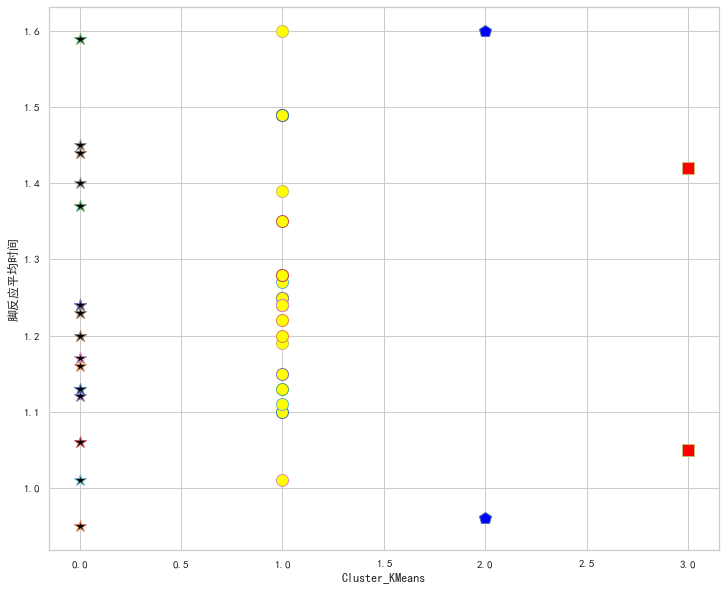

In [44]:
#绘制脚反应平均时间与目标变量的可视化聚类视图
tmp=np.array([Data_Drop_illegal_Mis['Cluster_KMeans'],Data_Drop_illegal_Mis['脚反应平均时间']]).T
fig = plt.figure(figsize=(12,10))
plt.xlabel('Cluster_KMeans')
plt.ylabel('脚反应平均时间')
for i in range(0,len(pre_y)): 
    if(pre_y[i]==0): 
        plt.plot(tmp[i,0],tmp[i,1],"*", markerfacecolor='black',markersize=12) 
    elif(pre_y[i]==1): 
        plt.plot(tmp[i,0],tmp[i,1],"o",markerfacecolor='yellow',markersize=12) 
    elif(pre_y[i]==2): 
        plt.plot(tmp[i,0],tmp[i,1],"pb", markerfacecolor='blue',markersize=12)
    elif(pre_y[i]==3): 
        plt.plot(tmp[i,0],tmp[i,1],"sy", markerfacecolor='red',markersize=12)
plt.savefig("D:/数据科学算法/期末论文/脚反应平均时间与目标变量的可视化聚类视图.png")
plt.show()

### 方差分析：将KMeans分类所得到的类别列作为因变量，八个指标项分别作为自变量，生成方差分析表，来判断自变量对于因变量影响程度的判断

In [45]:
Data_Drop_illegal_Mis['Cluster_KMeans']=Data_Drop_illegal_Mis['Cluster_KMeans'].astype('category')
model1=ols('手反应平均时间~Cluster_KMeans',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable1= anova_lm(model1) #生成方差分析表
print("关于手反应平均时间与Cluster_KMeans的方差分析表如下：")
print(anovatable1)
print("------------------------------------------------------")
model2=ols('手反应最短时间~Cluster_KMeans',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable2= anova_lm(model2) #生成方差分析表
print("关于手反应最短时间与Cluster_KMeans的方差分析表如下：")
print(anovatable2)
print("------------------------------------------------------")
model3=ols('脚反应平均时间~Cluster_KMeans',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable3= anova_lm(model3) #生成方差分析表
print("关于脚反应平均时间与Cluster_KMeans的方差分析表如下：")
print(anovatable3)
print("------------------------------------------------------")
model4=ols('脚反应最短时间~Cluster_KMeans',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable4= anova_lm(model4) #生成方差分析表
print("关于脚反应最短时间与Cluster_KMeans的方差分析表如下：")
print(anovatable4)
print("------------------------------------------------------")
model5=ols('脚反应时间标准差~Cluster_KMeans',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable5= anova_lm(model5) #生成方差分析表
print("关于脚反应时间标准差与Cluster_KMeans的方差分析表如下：")
print(anovatable5)
print("------------------------------------------------------")
model6=ols('手反应时间标准差~Cluster_KMeans',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable6= anova_lm(model6) #生成方差分析表
print("关于手反应时间标准差与Cluster_KMeans的方差分析表如下：")
print(anovatable6)
print("------------------------------------------------------")
model7=ols('脚反应错误次数~Cluster_KMeans',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable7= anova_lm(model7) #生成方差分析表
print("关于脚反应错误次数与Cluster_KMeans的方差分析表如下：")
print(anovatable7)
print("------------------------------------------------------")
model8=ols('手反应错误次数~Cluster_KMeans',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable8= anova_lm(model8) #生成方差分析表
print("关于手反应错误次数与Cluster_KMeans的方差分析表如下：")
print(anovatable8)

关于手反应平均时间与Cluster_KMeans的方差分析表如下：
                  df    sum_sq   mean_sq         F    PR(>F)
Cluster_KMeans   3.0  0.486298  0.162099  2.689993  0.060292
Residual        37.0  2.229624  0.060260       NaN       NaN
------------------------------------------------------
关于手反应最短时间与Cluster_KMeans的方差分析表如下：
                  df    sum_sq   mean_sq         F    PR(>F)
Cluster_KMeans   3.0  0.322970  0.107657  5.644665  0.002742
Residual        37.0  0.705674  0.019072       NaN       NaN
------------------------------------------------------
关于脚反应平均时间与Cluster_KMeans的方差分析表如下：
                  df    sum_sq   mean_sq         F    PR(>F)
Cluster_KMeans   3.0  0.011093  0.003698  0.120776  0.947298
Residual        37.0  1.132746  0.030615       NaN       NaN
------------------------------------------------------
关于脚反应最短时间与Cluster_KMeans的方差分析表如下：
                  df    sum_sq   mean_sq         F    PR(>F)
Cluster_KMeans   3.0  0.157279  0.052426  4.424493  0.009349
Residual        37.0  0.4384

In [46]:
list_anova = []
ANOVA = [anovatable1,anovatable2,anovatable3,anovatable4,anovatable5,anovatable6,anovatable7,anovatable8]
for j in ANOVA: 
    list_anova.append(j.iloc[0,4])

In [47]:
obj2 = pd.Series(list_anova,index = ['手反应平均时间与目标变量方差分析得到的p值','手反应最短时间与目标变量方差分析得到的p值','脚反应平均时间与目标变量方差分析得到的p值',
                                     '脚反应最短时间与目标变量方差分析得到的p值','脚反应时间标准差与目标变量方差分析得到的p值','手反应时间标准差与目标变量方差分析得到的p值',
                                     '脚反应错误次数与目标变量方差分析得到的p值','手反应错误次数与目标变量方差分析得到的p值'])
print("从大到小的方差分析表中P值大小排序:\n", obj2.sort_values(ascending=False))

从大到小的方差分析表中P值大小排序:
 脚反应平均时间与目标变量方差分析得到的p值     9.472978e-01
手反应时间标准差与目标变量方差分析得到的p值    7.231112e-01
脚反应时间标准差与目标变量方差分析得到的p值    3.910612e-01
手反应平均时间与目标变量方差分析得到的p值     6.029239e-02
脚反应最短时间与目标变量方差分析得到的p值     9.349317e-03
手反应最短时间与目标变量方差分析得到的p值     2.741627e-03
手反应错误次数与目标变量方差分析得到的p值     1.238183e-03
脚反应错误次数与目标变量方差分析得到的p值     2.136181e-20
dtype: float64


从方差分析所得到的p值来看，脚反应平均时间的p值为0.947，是八个变量中最大的，而脚反应错误次数得到的p值为2.136181e-20，是八个变量中最小的，故脚反应平均时间对KMeans聚类所得到的分类结果的影响程度最显著

# Modelling Multiple Classifiers And Analysis_Based on KMeans:

In [48]:
#自定义混淆矩阵正确率函数
def confusion_matrix_Accuracy(x,y,model):
    predict_train=model.predict(x)
    print(metrics.confusion_matrix(y, predict_train)) # 输出混淆矩阵信息
    print(metrics.classification_report(y,predict_train)) #输出分类报告信息,行输出实际观察，列输出预测结果

In [49]:
X = Data_Drop_illegal_Mis.iloc[:,0:28]
y = Data_Drop_illegal_Mis['Cluster_KMeans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)  #以8：2的比例切割训练集和测试集

## Strategy 1: KMeans Cluster + Logistic Classifier

In [50]:
#建立逻辑斯蒂分类器
LR_Classifiers = LogisticRegression(solver='liblinear', penalty='l1') 
LR_Classifiers.fit(X_train,y_train)
Predict_Logistic = LR_Classifiers.predict(X_test)

In [51]:
print('逻辑斯蒂分类算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,LR_Classifiers)

逻辑斯蒂分类算法 测试集 混淆矩阵及其正确率：
[[2 0]
 [0 7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



可以看到这里使用的Logistic分类器预测效果良好，召回率，准确率，F1得分都为100%，缺点在于由于样本量小，无法准确地判断，加之该分类器是建立在KMeans聚类分析的基础上，整个数据没有真实的标签值作为参照，故可信度有待进一步完善

In [52]:
#输出模型系数
print('训练模型自变量参数为：',LR_Classifiers.coef_)
print('训练模型截距为：',LR_Classifiers.intercept_)

训练模型自变量参数为： [[ 0.          0.          0.          0.          0.          0.
   0.01485787 -0.52601895  0.          0.          0.          0.
   0.          0.          0.          0.          1.0071497  -2.13329069
   0.          1.09341425  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -1.69932287  0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.37920847  0.
   0.         -1.05799248  0.          0.          0.          0.73934111
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -2.92534618  0.
   0.          0.69589375  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.01486
Feature: 7, Score: -0.52602
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 1.00715
Feature: 17, Score: -2.13329
Feature: 18, Score: 0.00000
Feature: 19, Score: 1.09341
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000


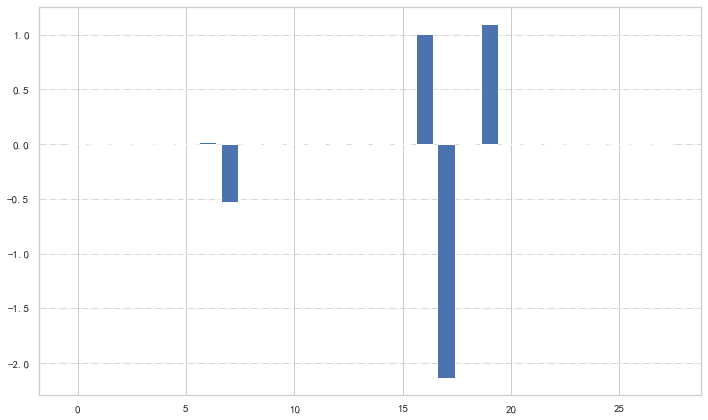

In [53]:
LR_importance = LR_Classifiers.coef_[0]
# summarize feature importance
for i,v in enumerate(LR_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(LR_importance))], LR_importance)
plt.grid(linestyle="-.", axis='y', alpha=0.8)
plt.tight_layout()
plt.show()
#17：二阶段脚反应最短时间；19：二阶段脚反应错误次数；16：二阶段脚反应平均时间；6：脚反应错误次数；7：手反应错误次数

### 这里定义计算反应能力得分的函数，将所得到的重要性大小作为各个属性的权重，并将这些权重都进行绝对值处理，由于各个指标项都属于与目标变量为负相关的关系，因此所得到的数值越低，说明测试人员反应能力越快

In [54]:
#自定义一个计算反应能力得分的函数
def Calculate_Score(a,data):
    b = np.abs(a)
    c = data.iloc[:,0:28]
    d = (c * b).sum(axis = 1)
    return d

In [55]:
KMeans_Logistic_Score = Calculate_Score(LR_importance,Data_Drop_illegal_Mis)
Data_Drop_illegal_Mis['KMeans_Logistic_Score'] = KMeans_Logistic_Score
#将计算得分按照数值从小到大排列，也就是反应能力从快到慢排序
KMeans_Logistic_Score.sort_values(ascending = True)

测试人员编号
8      3.481129
38     3.531487
0      3.811221
32     3.870296
25     3.895888
13     4.079818
1      4.135862
10     4.138269
37     4.143028
20     4.144744
17     4.182098
26     4.207552
14     4.209932
12     4.252598
34     4.277764
40     4.301766
3      4.381812
19     4.452313
30     4.461885
4      4.591170
16     4.750020
31     4.795907
18     4.828363
11     4.998903
39     5.210403
7      5.228305
24     5.231157
27     5.446229
29     5.761672
21     6.622358
2      6.710096
33     6.869471
36     6.979883
5      7.359963
28     7.423324
15     7.535965
23     7.536491
9      7.959843
22     8.113905
35    21.760889
6     22.199919
dtype: float64

In [56]:
#将KMeans聚类+Logistic分类器计算得到的反应能力的排名写到数据框中
KMeans_Logistic_Rank = Data_Drop_illegal_Mis['KMeans_Logistic_Score'].rank(method = 'min')
Data_Drop_illegal_Mis['KMeans_Logistic_Rank'] = KMeans_Logistic_Rank
Data_Drop_illegal_Mis['KMeans_Logistic_Rank'] = Data_Drop_illegal_Mis['KMeans_Logistic_Rank'].astype('int')

### 利用KMeans聚类法 + Logistic分类器所得到的反应最快和最慢的测试人员：

In [57]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['KMeans_Logistic_Rank'] == Data_Drop_illegal_Mis['KMeans_Logistic_Rank'].min()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,三阶段脚反应最短时间,三阶段脚反应标准差,三阶段手反应平均时间,三阶段手反应最短时间,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数,Cluster_KMeans,KMeans_Logistic_Score,KMeans_Logistic_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,0.87,0.12,0.9,0.79,0.12,0,0,1,3.481129,1


In [58]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['KMeans_Logistic_Rank'] == Data_Drop_illegal_Mis['KMeans_Logistic_Rank'].max()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,三阶段脚反应最短时间,三阶段脚反应标准差,三阶段手反应平均时间,三阶段手反应最短时间,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数,Cluster_KMeans,KMeans_Logistic_Score,KMeans_Logistic_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
6,1.6,1.28,0.39,2.09,1.5,0.72,8,3,1.45,1.28,...,1.4,0.55,1.81,1.57,0.27,0,2,2,22.199919,41


综上所述：数值越大，说明综合反应能力越差，因此从数值大小来看，基于KMeans聚类法+Logistic分类器得到的反应最快的测试人员为8号测试人员，反应最慢的测试人员为6号测试人员，该方式主要依据的标准是脚反应错误次数、手反应错误次数、二阶段脚反应平均时间、二阶段脚反应最短时间以及二阶段脚反应错误次数这五个标准，总体来说，该评分标准忽略了较多的参考变量，存在较大的不足，故需要其他算法进行改进。

由此可以看到对于Logistic分类器而言，脚反应错误次数对其分类重要性最高，手反应平均时间其次，最后是手反应错误次数；其余变量对其分类无贡献，这样来看分类器预测效果存在一定的缺陷，同时也说明需要更多的数据量进行验证

## Strategy 2: KMeans Cluster + XGBoost Classifier

In [59]:
XGB_Classifiers = XGBClassifier(max_depth = 3)
XGB_Classifiers.fit(X_train,y_train)
Predict_XGBoost = XGB_Classifiers.predict(X_test)

In [60]:
print('XGBoost算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,XGB_Classifiers)

XGBoost算法 测试集 混淆矩阵及其正确率：
[[2 0]
 [0 7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



Feature: 0, Score: 0.00135
Feature: 1, Score: 0.00320
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00417
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.48148
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.05814
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00362
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00263
Feature: 14, Score: 0.22150
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.01042
Feature: 17, Score: 0.07852
Feature: 18, Score: 0.00671
Feature: 19, Score: 0.09679
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01635
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00078
Feature: 24, Score: 0.01435
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000


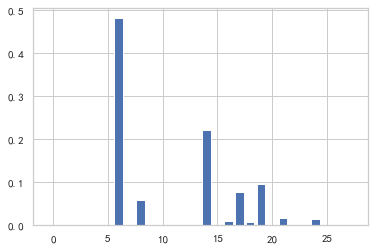

In [61]:
XGB_importance = XGB_Classifiers.feature_importances_
# summarize feature importance
for i,v in enumerate(XGB_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(XGB_importance))], XGB_importance)
plt.show() 
#0:脚反应平均时间,1:脚反应最短时间,4:手反应最短时间,6:脚反应错误次数,8:一阶段脚反应平均时间
#11:一阶段手反应平均时间,13:一阶段手反应时间标准差,14:一阶段脚反应错误次数,16:二阶段脚反应平均时间
#17:二阶段脚反应最短时间,18:二阶段脚反应标准差,19:二阶段脚反应错误次数,21:三阶段脚反应最短时间
#23:三阶段手反应平均时间,24:三阶段手反应最短时间

In [62]:
KMeans_XGBoost_Score = Calculate_Score(XGB_importance,Data_Drop_illegal_Mis)
Data_Drop_illegal_Mis['KMeans_XGBoost_Score'] = KMeans_XGBoost_Score
#将计算得分按照数值从小到大排列，也就是反应能力从快到慢排序
KMeans_XGBoost_Score.sort_values(ascending = True)

测试人员编号
8     0.180383
25    0.193815
38    0.196163
1     0.209284
14    0.210456
20    0.210473
40    0.210630
12    0.213921
17    0.223710
26    0.228706
31    0.234458
32    0.669985
10    0.679390
0     0.681670
19    0.698586
3     0.720427
18    0.723613
33    0.852339
21    0.852898
37    0.913949
16    1.244055
13    1.247811
27    1.272949
2     1.330669
29    1.370877
34    1.445898
4     1.455970
24    1.485504
36    1.857868
9     1.885510
23    1.947440
28    1.948807
5     1.951053
39    2.001276
30    2.122758
15    2.423301
22    2.508300
7     3.600894
11    3.829236
6     5.174518
35    6.123626
dtype: float64

In [63]:
#将KMeans聚类+XGBoost分类器计算得到的反应能力的排名写到数据框中
KMeans_XGBoost_Rank = Data_Drop_illegal_Mis['KMeans_XGBoost_Score'].rank(method = 'min')
Data_Drop_illegal_Mis['KMeans_XGBoost_Rank'] = KMeans_XGBoost_Rank
Data_Drop_illegal_Mis['KMeans_XGBoost_Rank'] = Data_Drop_illegal_Mis['KMeans_XGBoost_Rank'].astype('int')

### 利用KMeans聚类法 + XGBoost分类器所得到的反应最快和最慢的测试人员：

In [64]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['KMeans_XGBoost_Rank'] == Data_Drop_illegal_Mis['KMeans_XGBoost_Rank'].min()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,三阶段手反应平均时间,三阶段手反应最短时间,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数,Cluster_KMeans,KMeans_Logistic_Score,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,0.9,0.79,0.12,0,0,1,3.481129,1,0.180383,1


In [65]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['KMeans_XGBoost_Rank'] == Data_Drop_illegal_Mis['KMeans_XGBoost_Rank'].max()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,三阶段手反应平均时间,三阶段手反应最短时间,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数,Cluster_KMeans,KMeans_Logistic_Score,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
35,0.96,0.88,0.05,0.95,0.68,0.26,10,0,0.96,0.88,...,1.17,1.07,0.08,2,0,2,21.760889,40,6.123626,41


综上所述：数值越大，说明综合反应能力越差，因此从数值大小来看，基于KMeans聚类法+XGBoost分类器得到的反应最快的测试人员为8号测试人员，反应最慢的测试人员为35号测试人员，该方式主要依据的标准有脚反应平均时间、脚反应最短时间等15个标准，总体来说，相比Logistic分类器以及K最近邻分类器，该算法考虑了更多的属性，同时其权重也进行了一定的调整，不同属性间权重比较均匀平衡，评分效果良好。

## Strategy 3: KMeans Cluster + KNN Classifier

In [66]:
KN_Classifiers = KNeighborsClassifier(n_neighbors= 4)   #KNN分类器
KN_Classifiers.fit(X_train,y_train)
Predict_KNN = KN_Classifiers.predict(X_test)

In [67]:
print('K最近邻算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,KN_Classifiers)

K最近邻算法 测试集 混淆矩阵及其正确率：
[[2 0]
 [1 6]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.86      0.92         7

    accuracy                           0.89         9
   macro avg       0.83      0.93      0.86         9
weighted avg       0.93      0.89      0.90         9



Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.21875
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00625
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.11875
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000


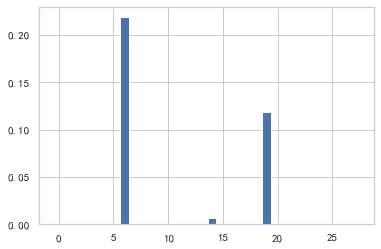

In [68]:
# perform permutation importance
results = permutation_importance(KN_Classifiers, X_train, y_train, scoring='accuracy')
# get importance
KNN_importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(KNN_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(KNN_importance))], KNN_importance)
plt.show()
#6:脚反应错误次数,7:手反应错误次数,19:二阶段脚反应错误次数

In [69]:
KMeans_KNN_Score = Calculate_Score(KNN_importance,Data_Drop_illegal_Mis)
Data_Drop_illegal_Mis['KMeans_KNN_Score'] = KMeans_KNN_Score
#将计算得分按照数值从小到大排列，也就是反应能力从快到慢排序
KMeans_KNN_Score.sort_values(ascending = True)

测试人员编号
20    0.00000
38    0.00000
31    0.00000
26    0.00000
25    0.00000
17    0.00000
14    0.00000
12    0.00000
40    0.00000
1     0.00000
8     0.00000
0     0.21875
10    0.21875
32    0.21875
18    0.21875
19    0.21875
3     0.21875
37    0.22500
33    0.33750
21    0.33750
13    0.55625
16    0.55625
2     0.55625
27    0.55625
34    0.56250
24    0.56250
4     0.56250
30    0.66875
29    0.67500
39    0.78125
36    0.89375
9     0.89375
23    1.01250
28    1.01250
5     1.01250
15    1.23125
7     1.23750
22    1.35000
11    1.45000
6     2.70000
35    3.13750
dtype: float64

In [70]:
#将KMeans聚类+K最近邻分类器计算得到的反应能力的排名写到数据框中
KMeans_KNN_Rank = Data_Drop_illegal_Mis['KMeans_KNN_Score'].rank(method = 'min')
Data_Drop_illegal_Mis['KMeans_KNN_Rank'] = KMeans_KNN_Rank
Data_Drop_illegal_Mis['KMeans_KNN_Rank'] = Data_Drop_illegal_Mis['KMeans_KNN_Rank'].astype('int')

### 利用KMeans聚类法 + KNN分类器所得到的反应最快和最慢的测试人员：

In [71]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['KMeans_KNN_Rank'] == Data_Drop_illegal_Mis['KMeans_KNN_Rank'].min()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数,Cluster_KMeans,KMeans_Logistic_Score,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
1,1.22,0.80,0.37,0.91,0.60,0.32,0,0,0.92,0.80,...,0.40,0,0,1,4.135862,7,0.209284,4,0.0,1
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,0.12,0,0,1,3.481129,1,0.180383,1,0.0,1
12,1.27,0.73,0.35,0.88,0.70,0.17,0,0,0.88,0.73,...,0.08,0,0,1,4.252598,14,0.213921,8,0.0,1
14,1.20,0.78,0.36,1.02,0.76,0.41,0,0,0.92,0.78,...,0.55,0,0,1,4.209932,13,0.210456,5,0.0,1
17,1.25,0.88,0.23,1.07,0.81,0.34,0,0,0.98,0.88,...,0.32,0,0,1,4.182098,11,0.223710,9,0.0,1
20,1.25,0.81,0.32,0.92,0.63,0.39,0,0,0.90,0.81,...,0.56,0,0,1,4.144744,10,0.210473,6,0.0,1
25,1.13,0.69,0.33,0.86,0.62,0.15,0,0,0.82,0.69,...,0.13,0,0,1,3.895888,5,0.193815,2,0.0,1
26,1.28,0.69,0.38,1.48,0.79,0.55,0,0,0.99,0.69,...,0.16,0,0,1,4.207552,12,0.228706,10,0.0,1
31,1.39,0.77,0.71,0.93,0.69,0.29,0,0,1.01,0.77,...,0.17,0,0,1,4.795907,22,0.234458,11,0.0,1


In [72]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['KMeans_KNN_Rank'] == Data_Drop_illegal_Mis['KMeans_KNN_Rank'].max()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,三阶段手反应时间标准差,三阶段脚反应错误次数,三阶段手反应错误次数,Cluster_KMeans,KMeans_Logistic_Score,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
35,0.96,0.88,0.05,0.95,0.68,0.26,10,0,0.96,0.88,...,0.08,2,0,2,21.760889,40,6.123626,41,3.1375,41


综上所述：数值越大，说明综合反应能力越差，因此从数值大小来看，基于KMeans聚类法+KNN分类器得到的反应最快的测试人员为1、8、12、14、17、20、25、26、31、38、40号测试人员，反应最慢的测试人员为35号测试人员，该方式主要依据的标准是脚反应错误次数、手反应错误次数和二阶段脚反应错误次数这三个属性，总体来说，该算法得到的结果主要关注的是测试人员所犯错误的次数，因此没有将时间等因素纳入考量，参考范围单一，故得到的反应最快的测试人员有11位，有一定的参考价值，但相比XGBoost要差一些。

## GMM Clustering：

### 为什么要使用高斯混合模型进行聚类？
KMeans存在两个缺点: 类的形状缺少灵活性、缺少簇分配的概率——使得它对许多数据集（特别是低维数据集）的拟合效果不尽如人意。

### 使用高斯混合模型(GMM)进行聚类：

In [73]:
X = Data_Drop_illegal_Mis.iloc[:,0:28]
gmm =GaussianMixture(n_components=5, random_state = 1234)  #第一个参数设置的是需要聚类的个数，第二个参数设定于KMeans相同的随机种子数
gmm.fit(X)   #拟合前八项指标的数据
Cluster_GMM = gmm.predict(X)  #对拟合的数据进行预测

In [74]:
Cluster_GMM

array([0, 4, 0, 0, 0, 2, 1, 3, 4, 2, 0, 3, 4, 0, 4, 2, 0, 4, 0, 0, 4, 0,
       2, 2, 0, 4, 4, 0, 2, 2, 3, 4, 0, 0, 0, 1, 2, 0, 4, 0, 4],
      dtype=int64)

In [75]:
gmm.aic(X)    
#分为2类：AIC=-3817.8495957869627,样本的平均对数似然得分为67.75
#分为3类：AIC=-3639.599022735474,样本的平均对数似然得分为76.19
#分为4类：AIC=-3483.270062432239,样本的平均对数似然得分为84.89
#分为5类：AIC=-4332.183326295173,样本的平均对数似然得分为105.86

-4332.183326295173

In [76]:
gmm.score(X)   #计算样本的平均对数似然

105.85589422311187

这里由于数据量很少，因此没有进行较多次数的迭代，通过尝试n_components=2、3、4、5，分别得到对应模型的平均对数似然函数以及AIC信息熵，最优效果则是实现极大似然估计以及AIC最小，故综合比较四个模型，认为选择将簇数设置为5

In [77]:
Data_Drop_illegal_Mis['Cluster_GMM'] = Cluster_GMM
Data_Drop_illegal_Mis

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,三阶段脚反应错误次数,三阶段手反应错误次数,Cluster_KMeans,KMeans_Logistic_Score,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank,Cluster_GMM
测试人员编号,,,,,,,,,,,,,,,,,,,,,
0,1.10,0.83,0.21,1.19,0.68,0.70,1,0,0.86,0.83,...,1,0,1,3.811221,3,0.681670,14,0.21875,12,0
1,1.22,0.80,0.37,0.91,0.60,0.32,0,0,0.92,0.80,...,0,0,1,4.135862,7,0.209284,4,0.00000,1,4
2,1.59,0.89,0.55,0.98,0.64,0.32,2,0,1.22,0.89,...,1,0,0,6.710096,31,1.330669,24,0.55625,21,0
3,1.35,0.83,0.31,1.28,0.66,0.85,1,0,1.07,0.83,...,1,0,1,4.381812,17,0.720427,16,0.21875,12,0
4,1.12,0.69,0.37,0.83,0.62,0.18,2,0,0.81,0.69,...,0,0,0,4.591170,20,1.455970,27,0.56250,25,0
5,1.20,0.89,0.19,0.96,0.63,0.21,3,0,1.04,0.89,...,0,0,0,7.359963,34,1.951053,33,1.01250,33,2
6,1.60,1.28,0.39,2.09,1.50,0.72,8,3,1.45,1.28,...,0,2,2,22.199919,41,5.174518,40,2.70000,40,1
7,1.42,0.83,0.34,0.89,0.58,0.28,5,0,0.84,0.83,...,0,0,3,5.228305,26,3.600894,38,1.23750,37,3
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,0,0,1,3.481129,1,0.180383,1,0.00000,1,4


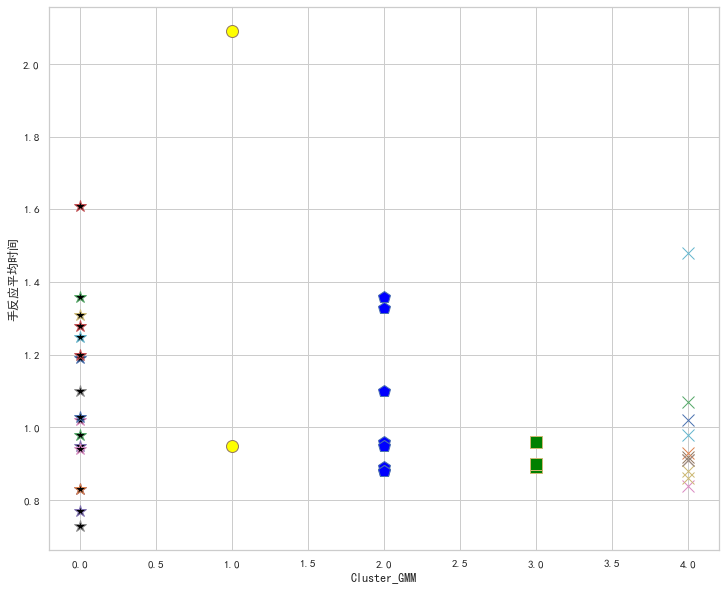

In [78]:
#绘制手反应平均时间与目标变量的可视化聚类视图
tmp=np.array([Data_Drop_illegal_Mis['Cluster_GMM'],Data_Drop_illegal_Mis['手反应平均时间']]).T
fig = plt.figure(figsize=(12,10))
plt.xlabel('Cluster_GMM')
plt.ylabel('手反应平均时间')
for i in range(0,len(Cluster_GMM)): 
    if(Cluster_GMM[i]==0): 
        plt.plot(tmp[i,0],tmp[i,1],"*", markerfacecolor='black',markersize=12) 
    elif(Cluster_GMM[i]==1): 
        plt.plot(tmp[i,0],tmp[i,1],"o",markerfacecolor='yellow',markersize=12) 
    elif(Cluster_GMM[i]==2): 
        plt.plot(tmp[i,0],tmp[i,1],"pb", markerfacecolor='blue',markersize=12)
    elif(Cluster_GMM[i]==3): 
        plt.plot(tmp[i,0],tmp[i,1],"sy",markerfacecolor='green',markersize=12) 
    elif(Cluster_GMM[i]==4): 
        plt.plot(tmp[i,0],tmp[i,1],"x", markerfacecolor='orange',markersize=12)
plt.savefig("D:/数据科学算法/期末论文/手反应平均时间与目标变量的可视化聚类视图.png")
plt.show()

In [79]:
Data_Drop_illegal_Mis['Cluster_GMM']=Data_Drop_illegal_Mis['Cluster_GMM'].astype('category')
model1=ols('手反应平均时间~Cluster_GMM',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable1= anova_lm(model1) #生成方差分析表
print("关于手反应平均时间与Cluster_GMM的方差分析表如下：")
print(anovatable1)
print("------------------------------------------------------")
model2=ols('手反应最短时间~Cluster_GMM',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable2= anova_lm(model2) #生成方差分析表
print("关于手反应最短时间与Cluster_GMM的方差分析表如下：")
print(anovatable2)
print("------------------------------------------------------")
model3=ols('脚反应平均时间~Cluster_GMM',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable3= anova_lm(model3) #生成方差分析表
print("关于脚反应平均时间与Cluster_GMM的方差分析表如下：")
print(anovatable3)
print("------------------------------------------------------")
model4=ols('脚反应最短时间~Cluster_GMM',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable4= anova_lm(model4) #生成方差分析表
print("关于脚反应最短时间与Cluster_GMM的方差分析表如下：")
print(anovatable4)
print("------------------------------------------------------")
model5=ols('脚反应时间标准差~Cluster_GMM',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable5= anova_lm(model5) #生成方差分析表
print("关于脚反应时间标准差与Cluster_GMM的方差分析表如下：")
print(anovatable5)
print("------------------------------------------------------")
model6=ols('手反应时间标准差~Cluster_GMM',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable6= anova_lm(model6) #生成方差分析表
print("关于手反应时间标准差与Cluster_GMM的方差分析表如下：")
print(anovatable6)
print("------------------------------------------------------")
model7=ols('脚反应错误次数~Cluster_GMM',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable7= anova_lm(model7) #生成方差分析表
print("关于脚反应错误次数与Cluster_GMM的方差分析表如下：")
print(anovatable7)
print("------------------------------------------------------")
model8=ols('手反应错误次数~Cluster_GMM',Data_Drop_illegal_Mis).fit() #建立方差分析模型
anovatable8= anova_lm(model8) #生成方差分析表
print("关于手反应错误次数与Cluster_GMM的方差分析表如下：")
print(anovatable8)

关于手反应平均时间与Cluster_GMM的方差分析表如下：
               df    sum_sq   mean_sq         F    PR(>F)
Cluster_GMM   4.0  0.561328  0.140332  2.344733  0.073119
Residual     36.0  2.154594  0.059850       NaN       NaN
------------------------------------------------------
关于手反应最短时间与Cluster_GMM的方差分析表如下：
               df    sum_sq   mean_sq         F    PR(>F)
Cluster_GMM   4.0  0.334613  0.083653  4.339166  0.005755
Residual     36.0  0.694031  0.019279       NaN       NaN
------------------------------------------------------
关于脚反应平均时间与Cluster_GMM的方差分析表如下：
               df    sum_sq   mean_sq         F    PR(>F)
Cluster_GMM   4.0  0.033614  0.008403  0.272488  0.893775
Residual     36.0  1.110225  0.030840       NaN       NaN
------------------------------------------------------
关于脚反应最短时间与Cluster_GMM的方差分析表如下：
               df    sum_sq   mean_sq         F    PR(>F)
Cluster_GMM   4.0  0.190414  0.047603  4.228446  0.006588
Residual     36.0  0.405284  0.011258       NaN       NaN
---------------

In [80]:
list_anova2 = []
ANOVA = [anovatable1,anovatable2,anovatable3,anovatable4,anovatable5,anovatable6,anovatable7,anovatable8]
for j in ANOVA: 
    list_anova2.append(j.iloc[0,4])

In [81]:
obj3 = pd.Series(list_anova2,index = ['手反应平均时间与目标变量方差分析得到的p值','手反应最短时间与目标变量方差分析得到的p值','脚反应平均时间与目标变量方差分析得到的p值',
                                     '脚反应最短时间与目标变量方差分析得到的p值','脚反应时间标准差与目标变量方差分析得到的p值','手反应时间标准差与目标变量方差分析得到的p值',
                                     '脚反应错误次数与目标变量方差分析得到的p值','手反应错误次数与目标变量方差分析得到的p值'])
print("从大到小的方差分析表中P值大小排序:\n", obj3.sort_values(ascending=False))

从大到小的方差分析表中P值大小排序:
 脚反应平均时间与目标变量方差分析得到的p值     8.937753e-01
手反应时间标准差与目标变量方差分析得到的p值    4.944966e-01
脚反应时间标准差与目标变量方差分析得到的p值    4.553068e-01
手反应平均时间与目标变量方差分析得到的p值     7.311939e-02
脚反应最短时间与目标变量方差分析得到的p值     6.587881e-03
手反应最短时间与目标变量方差分析得到的p值     5.755408e-03
手反应错误次数与目标变量方差分析得到的p值     4.150001e-03
脚反应错误次数与目标变量方差分析得到的p值     4.667868e-19
dtype: float64


从方差分析所得到的p值来看，脚反应平均时间的p值为0.8937753，是八个变量中最大的，而脚反应错误次数得到的p值为4.667868e-19，是八个变量中最小的，故脚反应平均时间对高斯混合模型聚类所得到的分类结果的影响程度最显著，与KMeans聚类得到的结论相似

# Modelling Multiple Classifiers And Analysis_Based on GMM:

In [82]:
X = Data_Drop_illegal_Mis.iloc[:,0:28]
y = Data_Drop_illegal_Mis['Cluster_GMM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)  #以8：2的比例切割训练集和测试集

## Strategy 1: GMM Cluster + Decision Tree Classifier(Cart Gini/C5.0)

In [83]:
#建立两种决策树分类器
GINI_Classifiers=tree.DecisionTreeClassifier(criterion='gini', random_state=1234, max_depth=3)   #CRAT gini算法
GINI_Classifiers.fit(X_train,y_train)
Predict_GINI = GINI_Classifiers.predict(X_test)

C5_Classifiers=tree.DecisionTreeClassifier(criterion='entropy',random_state=1234, max_depth=3)   #采用 C5.0 熵标准算法
C5_Classifiers.fit(X_train,y_train)
Predict_C5 = C5_Classifiers.predict(X_test)

In [84]:
print('CRAT gini算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,GINI_Classifiers)
print("------------------------------------------------------")
print('C5.0 熵标准算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,C5_Classifiers)

CRAT gini算法 测试集 混淆矩阵及其正确率：
[[3 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

------------------------------------------------------
C5.0 熵标准算法 测试集 混淆矩阵及其正确率：
[[3 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



CART gini 算法 决策树分类规则及可视化
CART gini算法主要自变量X[6],X[14],X[19]


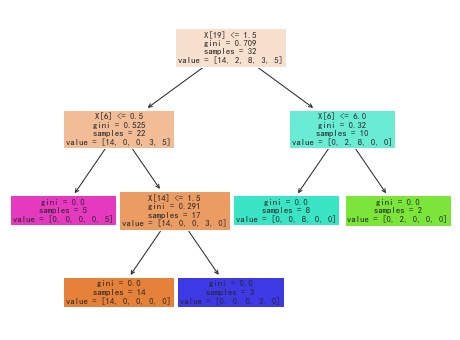

In [85]:
print('CART gini 算法 决策树分类规则及可视化')
plt.figure(figsize=(8,6))
plot_tree(GINI_Classifiers,filled=True)
print("CART gini算法主要自变量X[6],X[14],X[19]")

C5.0 熵标准算法 决策树分类规则及可视化
C5.0 熵标准算法主要自变量X[6],X[14],X[19]


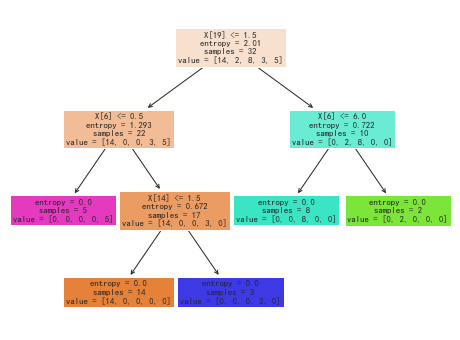

In [86]:
print('C5.0 熵标准算法 决策树分类规则及可视化')
plt.figure(figsize=(8,6))
plot_tree(C5_Classifiers,filled=True)
print("C5.0 熵标准算法主要自变量X[6],X[14],X[19]")

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.43214
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.21779
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.35006
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000


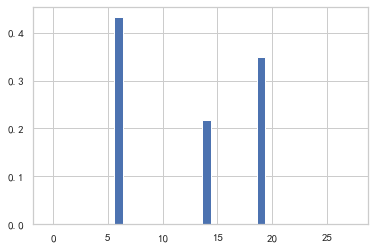

In [87]:
GINI_importance = GINI_Classifiers.feature_importances_
# summarize feature importance
for i,v in enumerate(GINI_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(GINI_importance))], GINI_importance)
plt.show()

In [88]:
GMM_GINI_Score = Calculate_Score(GINI_importance,Data_Drop_illegal_Mis)
Data_Drop_illegal_Mis['GMM_GINI_Score'] = GMM_GINI_Score
#将计算得分按照数值从小到大排列，也就是反应能力从快到慢排序
GMM_GINI_Score.sort_values(ascending = True)

测试人员编号
20    0.000000
38    0.000000
31    0.000000
26    0.000000
25    0.000000
17    0.000000
14    0.000000
12    0.000000
40    0.000000
1     0.000000
8     0.000000
0     0.432144
10    0.432144
32    0.432144
18    0.432144
19    0.432144
3     0.432144
37    0.649937
33    0.782207
21    0.782207
13    1.214352
16    1.214352
2     1.214352
27    1.214352
34    1.432144
24    1.432144
4     1.432144
29    1.564414
30    1.732019
39    1.864289
36    1.996559
9     1.996559
23    2.346621
28    2.346621
5     2.346621
15    2.778766
22    3.128828
7     3.381957
11    3.596308
6     6.257657
35    7.121946
dtype: float64

In [89]:
#将GMM聚类+Cart Gini决策树分类器计算得到的反应能力的排名写到数据框中
GMM_GINI_Rank = Data_Drop_illegal_Mis['GMM_GINI_Score'].rank(method = 'min')
Data_Drop_illegal_Mis['GMM_GINI_Rank'] = GMM_GINI_Rank
Data_Drop_illegal_Mis['GMM_GINI_Rank'] = Data_Drop_illegal_Mis['GMM_GINI_Rank'].astype('int')

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.37664
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.17766
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.44570
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000


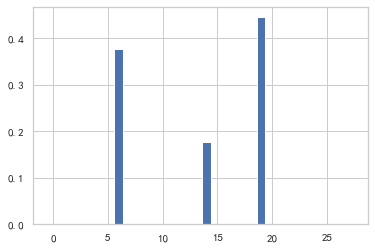

In [90]:
C5_importance = C5_Classifiers.feature_importances_
# summarize feature importance
for i,v in enumerate(C5_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(C5_importance))], C5_importance)
plt.show()

In [91]:
GMM_C5_Score = Calculate_Score(C5_importance,Data_Drop_illegal_Mis)
Data_Drop_illegal_Mis['GMM_C5_Score'] = GMM_C5_Score
#将计算得分按照数值从小到大排列，也就是反应能力从快到慢排序
GMM_C5_Score.sort_values(ascending = True)

测试人员编号
20    0.000000
38    0.000000
31    0.000000
26    0.000000
25    0.000000
17    0.000000
14    0.000000
12    0.000000
40    0.000000
1     0.000000
8     0.000000
0     0.376641
10    0.376641
32    0.376641
18    0.376641
19    0.376641
3     0.376641
37    0.554296
33    0.822345
21    0.822345
13    1.198986
16    1.198986
2     1.198986
27    1.198986
34    1.376641
24    1.376641
4     1.376641
30    1.485234
29    1.644689
39    1.753282
36    2.021330
9     2.021330
23    2.467034
28    2.467034
5     2.467034
15    2.843675
7     3.039531
11    3.238516
22    3.289379
6     6.578757
35    7.332040
dtype: float64

In [92]:
#将GMM聚类+C5.0决策树分类器计算得到的反应能力的排名写到数据框中
GMM_C5_Rank = Data_Drop_illegal_Mis['GMM_C5_Score'].rank(method = 'min')
Data_Drop_illegal_Mis['GMM_C5_Rank'] = GMM_C5_Rank
Data_Drop_illegal_Mis['GMM_C5_Rank'] = Data_Drop_illegal_Mis['GMM_C5_Rank'].astype('int')

### 利用GMM聚类法 + Cart Gini/C5.0决策树分类器所得到的反应最快和最慢的测试人员：

In [93]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['GMM_GINI_Rank'] == Data_Drop_illegal_Mis['GMM_GINI_Rank'].min()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank,Cluster_GMM,GMM_GINI_Score,GMM_GINI_Rank,GMM_C5_Score,GMM_C5_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
1,1.22,0.80,0.37,0.91,0.60,0.32,0,0,0.92,0.80,...,7,0.209284,4,0.0,1,4,0.0,1,0.0,1
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,1,0.180383,1,0.0,1,4,0.0,1,0.0,1
12,1.27,0.73,0.35,0.88,0.70,0.17,0,0,0.88,0.73,...,14,0.213921,8,0.0,1,4,0.0,1,0.0,1
14,1.20,0.78,0.36,1.02,0.76,0.41,0,0,0.92,0.78,...,13,0.210456,5,0.0,1,4,0.0,1,0.0,1
17,1.25,0.88,0.23,1.07,0.81,0.34,0,0,0.98,0.88,...,11,0.223710,9,0.0,1,4,0.0,1,0.0,1
20,1.25,0.81,0.32,0.92,0.63,0.39,0,0,0.90,0.81,...,10,0.210473,6,0.0,1,4,0.0,1,0.0,1
25,1.13,0.69,0.33,0.86,0.62,0.15,0,0,0.82,0.69,...,5,0.193815,2,0.0,1,4,0.0,1,0.0,1
26,1.28,0.69,0.38,1.48,0.79,0.55,0,0,0.99,0.69,...,12,0.228706,10,0.0,1,4,0.0,1,0.0,1
31,1.39,0.77,0.71,0.93,0.69,0.29,0,0,1.01,0.77,...,22,0.234458,11,0.0,1,4,0.0,1,0.0,1


In [94]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['GMM_GINI_Rank'] == Data_Drop_illegal_Mis['GMM_GINI_Rank'].max()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank,Cluster_GMM,GMM_GINI_Score,GMM_GINI_Rank,GMM_C5_Score,GMM_C5_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
35,0.96,0.88,0.05,0.95,0.68,0.26,10,0,0.96,0.88,...,40,6.123626,41,3.1375,41,1,7.121946,41,7.33204,41


In [95]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['GMM_C5_Rank'] == Data_Drop_illegal_Mis['GMM_C5_Rank'].min()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank,Cluster_GMM,GMM_GINI_Score,GMM_GINI_Rank,GMM_C5_Score,GMM_C5_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
1,1.22,0.80,0.37,0.91,0.60,0.32,0,0,0.92,0.80,...,7,0.209284,4,0.0,1,4,0.0,1,0.0,1
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,1,0.180383,1,0.0,1,4,0.0,1,0.0,1
12,1.27,0.73,0.35,0.88,0.70,0.17,0,0,0.88,0.73,...,14,0.213921,8,0.0,1,4,0.0,1,0.0,1
14,1.20,0.78,0.36,1.02,0.76,0.41,0,0,0.92,0.78,...,13,0.210456,5,0.0,1,4,0.0,1,0.0,1
17,1.25,0.88,0.23,1.07,0.81,0.34,0,0,0.98,0.88,...,11,0.223710,9,0.0,1,4,0.0,1,0.0,1
20,1.25,0.81,0.32,0.92,0.63,0.39,0,0,0.90,0.81,...,10,0.210473,6,0.0,1,4,0.0,1,0.0,1
25,1.13,0.69,0.33,0.86,0.62,0.15,0,0,0.82,0.69,...,5,0.193815,2,0.0,1,4,0.0,1,0.0,1
26,1.28,0.69,0.38,1.48,0.79,0.55,0,0,0.99,0.69,...,12,0.228706,10,0.0,1,4,0.0,1,0.0,1
31,1.39,0.77,0.71,0.93,0.69,0.29,0,0,1.01,0.77,...,22,0.234458,11,0.0,1,4,0.0,1,0.0,1


In [96]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['GMM_C5_Rank'] == Data_Drop_illegal_Mis['GMM_C5_Rank'].max()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank,Cluster_GMM,GMM_GINI_Score,GMM_GINI_Rank,GMM_C5_Score,GMM_C5_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
35,0.96,0.88,0.05,0.95,0.68,0.26,10,0,0.96,0.88,...,40,6.123626,41,3.1375,41,1,7.121946,41,7.33204,41


综上所述：数值越大，说明综合反应能力越差，因此从数值大小来看，基于高斯混合模型聚类法+Cart Gini/C5.0决策树分类器得到的反应最快的测试人员为1、8、12、14、17、20、25、26、31、38、40号测试人员，反应最慢的测试人员为35号测试人员，该方式主要依据的标准是脚反应错误次数、一阶段脚反应错误次数和二阶段脚反应错误次数这三个属性，总体来说，该算法得到的结果与前面基于KMeans+K最近邻分类器得到的结果几乎一致，尽在考量标准上有一个变化，得到的评价结果都是一样的，两种方式都着重点都在测试人员反应错误的次数方面，故评价方式较为单一。

## Strategy 2: GMM Cluster + Random Forest Classifier

In [126]:
RF_Classifiers = RandomForestClassifier(n_estimators=8, random_state=1234, max_depth = 3)  #随机森林分类器
RF_Classifiers.fit(X_train,y_train)
Predict_RF = RF_Classifiers.predict(X_test)
#2：0.67,3：0.89,4：0.89,5：0.78,6：0.89,7：1,8:1,9:0.67,10:0.67

In [127]:
print('随机森林算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,RF_Classifiers)

随机森林算法 测试集 混淆矩阵及其正确率：
[[3 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



Feature: 0, Score: 0.00911
Feature: 1, Score: 0.02919
Feature: 2, Score: 0.05483
Feature: 3, Score: 0.02199
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01058
Feature: 6, Score: 0.14497
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.03901
Feature: 12, Score: 0.02802
Feature: 13, Score: 0.06022
Feature: 14, Score: 0.12888
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00736
Feature: 17, Score: 0.06040
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.20442
Feature: 20, Score: 0.01988
Feature: 21, Score: 0.01598
Feature: 22, Score: 0.04347
Feature: 23, Score: 0.05181
Feature: 24, Score: 0.04646
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02341
Feature: 27, Score: 0.00000


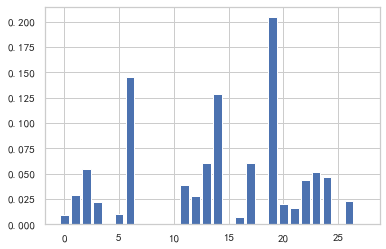

In [128]:
# get importance
RF_importance = RF_Classifiers.feature_importances_
# summarize feature importance
for i,v in enumerate(RF_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(RF_importance))], RF_importance)
plt.show()
#0:脚反应平均时间,1:脚反应最短时间，2:脚反应时间标准差,3：手反应平均时间，5:手反应时间标准差,6:脚反应错误次数
#11:一阶段手反应平均时间,12:一阶段手反应最短时间,13:一阶段手反应时间标准差,14:一阶段脚反应错误次数，16：二阶段脚反应平均时间
#17:二阶段脚反应最短时间,19:二阶段脚反应错误次数,20:三阶段脚反应平均时间，21：三阶段脚反应最短时间
#22:三阶段脚反应标准差,23:三阶段手反应平均时间,24：三阶段手反应最短时间，26:三阶段脚反应错误次数

In [129]:
GMM_RF_Score = Calculate_Score(RF_importance,Data_Drop_illegal_Mis)
Data_Drop_illegal_Mis['GMM_RF_Score'] = GMM_RF_Score
#将计算得分按照数值从小到大排列，也就是反应能力从快到慢排序
GMM_RF_Score.sort_values(ascending = True)

测试人员编号
8     0.321490
25    0.336813
38    0.348630
1     0.362116
12    0.376841
20    0.378266
40    0.384579
14    0.384630
31    0.405533
17    0.410955
10    0.488013
26    0.493021
19    0.545582
0     0.583182
32    0.588081
37    0.653144
3     0.669330
18    0.736724
21    0.789320
33    0.825359
16    0.859806
34    0.906804
27    0.913243
13    0.919942
4     0.940379
2     0.951174
24    1.018855
30    1.107807
29    1.170128
9     1.266795
36    1.276495
39    1.278172
5     1.415720
23    1.454950
28    1.505272
15    1.568903
22    1.753676
7     1.837455
11    1.858371
6     3.650092
35    3.738446
dtype: float64

In [130]:
#将GMM聚类+随机森林树分类器计算得到的反应能力的排名写到数据框中
GMM_RF_Rank = Data_Drop_illegal_Mis['GMM_RF_Score'].rank(method = 'min')
Data_Drop_illegal_Mis['GMM_RF_Rank'] = GMM_RF_Rank
Data_Drop_illegal_Mis['GMM_RF_Rank'] = Data_Drop_illegal_Mis['GMM_RF_Rank'].astype('int')

### 利用GMM聚类法 + 随机森林树分类器所得到的反应最快和最慢的测试人员：

In [131]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['GMM_RF_Rank'] == Data_Drop_illegal_Mis['GMM_RF_Rank'].min()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank,Cluster_GMM,GMM_GINI_Score,GMM_GINI_Rank,GMM_C5_Score,GMM_C5_Rank,GMM_RF_Score,GMM_RF_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,1,0.0,1,4,0.0,1,0.0,1,0.32149,1


In [132]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['GMM_RF_Rank'] == Data_Drop_illegal_Mis['GMM_RF_Rank'].max()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank,Cluster_GMM,GMM_GINI_Score,GMM_GINI_Rank,GMM_C5_Score,GMM_C5_Rank,GMM_RF_Score,GMM_RF_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
35,0.96,0.88,0.05,0.95,0.68,0.26,10,0,0.96,0.88,...,41,3.1375,41,1,7.121946,41,7.33204,41,3.738446,41


综上所述：数值越大，说明综合反应能力越差，因此从数值大小来看，基于高斯混合模型聚类法+随机森林树分类器得到的反应最快的测试人员为8号测试人员，反应最慢的测试人员为35号测试人员，该方式主要依据的标准是脚反应平均时间、脚反应时间标准差、手反应时间标准差等19个属性，总体来说，该算法得到的结果与相比Cart gini/C5.0决策树考虑范围更加全面，与KMeans聚类+XGBoost分类器相比，其考量的属性多了4个，但两者参考范围都较为全面了，参考价值也比较高。

## Strategy 3: GMM Cluster + Extra Trees Classifier

In [169]:
ET_Classifiers = ExtraTreesClassifier(n_estimators=10, random_state=1234)  #极度随机树分类器
ET_Classifiers.fit(X_train,y_train)
Predict_ET = ET_Classifiers.predict(X_test)
#2:0.33,3:0.67,4:0.78,5:0.78,6:0.89,7:0.78,8:0.67,9:1,10:1

In [170]:
print('极端随机树算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,ET_Classifiers)

极端随机树算法 测试集 混淆矩阵及其正确率：
[[3 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



Feature: 0, Score: 0.01277
Feature: 1, Score: 0.03224
Feature: 2, Score: 0.01811
Feature: 3, Score: 0.02198
Feature: 4, Score: 0.01023
Feature: 5, Score: 0.03630
Feature: 6, Score: 0.18364
Feature: 7, Score: 0.02259
Feature: 8, Score: 0.03110
Feature: 9, Score: 0.01945
Feature: 10, Score: 0.01748
Feature: 11, Score: 0.01213
Feature: 12, Score: 0.01559
Feature: 13, Score: 0.02609
Feature: 14, Score: 0.07430
Feature: 15, Score: 0.00394
Feature: 16, Score: 0.00965
Feature: 17, Score: 0.04924
Feature: 18, Score: 0.02022
Feature: 19, Score: 0.15928
Feature: 20, Score: 0.02360
Feature: 21, Score: 0.02900
Feature: 22, Score: 0.01734
Feature: 23, Score: 0.01051
Feature: 24, Score: 0.01647
Feature: 25, Score: 0.06086
Feature: 26, Score: 0.05824
Feature: 27, Score: 0.00764


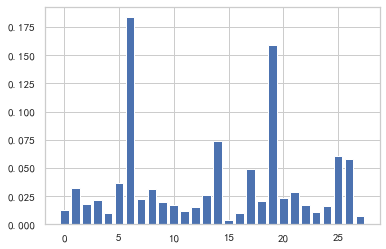

In [171]:
# get importance
ET_importance = ET_Classifiers.feature_importances_
# summarize feature importance
for i,v in enumerate(ET_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(ET_importance))], ET_importance)
plt.show()
#去除第二阶段所犯的违法错误的次数外的全部属性
#1:脚反应最短时间,2:脚反应时间标准差,3:手反应平均时间
#6:脚反应错误次数,7:手反应错误次数,8:一阶段脚反应平均时间,9:一阶段脚反应最短时间,10:一阶段脚反应最短时间
#11:一阶段手反应平均时间,12:一阶段手反应最短时间,13:一阶段手反应时间标准差,14:一阶段脚反应错误次数
#15:一阶段手反应错误次数,16:二阶段脚反应平均时间,17:二阶段脚反应最短时间,19:二阶段脚反应错误次数,21:三阶段脚反应最短时间
#24:三阶段手反应最短时间,25:三阶段手反应时间标准差,26:三阶段脚反应错误次数,27:三阶段手反应错误次数

In [172]:
GMM_ET_Score = Calculate_Score(ET_importance,Data_Drop_illegal_Mis)
Data_Drop_illegal_Mis['GMM_ET_Score'] = GMM_ET_Score
#将计算得分按照数值从小到大排列，也就是反应能力从快到慢排序
GMM_ET_Score.sort_values(ascending = True)

测试人员编号
8     0.284533
25    0.299278
38    0.334621
12    0.336266
40    0.343065
1     0.349916
31    0.361302
14    0.365129
20    0.366415
17    0.369844
26    0.398952
10    0.534985
37    0.596983
19    0.600299
32    0.623629
0     0.634802
3     0.696194
18    0.761483
21    0.769570
33    0.782511
34    0.873288
4     0.892431
16    0.901325
13    0.943603
27    0.962634
24    0.963360
2     0.995367
29    1.118025
30    1.132448
39    1.271766
36    1.294244
9     1.333173
5     1.366831
23    1.415939
28    1.422142
15    1.592837
22    1.683866
7     1.730858
11    1.948149
6     3.544518
35    3.751319
dtype: float64

In [173]:
#将GMM聚类+极端随机树分类器计算得到的反应能力的排名写到数据框中
GMM_ET_Rank = Data_Drop_illegal_Mis['GMM_ET_Score'].rank(method = 'min')
Data_Drop_illegal_Mis['GMM_ET_Rank'] = GMM_ET_Rank
Data_Drop_illegal_Mis['GMM_ET_Rank'] = Data_Drop_illegal_Mis['GMM_ET_Rank'].astype('int')

### 利用GMM聚类法 + 极端随机树分类器所得到的反应最快和最慢的测试人员：

In [174]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['GMM_ET_Rank'] == Data_Drop_illegal_Mis['GMM_ET_Rank'].min()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,KMeans_KNN_Rank,Cluster_GMM,GMM_GINI_Score,GMM_GINI_Rank,GMM_C5_Score,GMM_C5_Rank,GMM_RF_Score,GMM_RF_Rank,GMM_ET_Score,GMM_ET_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
8,1.01,0.69,0.19,0.84,0.51,0.28,0,0,0.82,0.69,...,1,4,0.0,1,0.0,1,0.32149,1,0.284533,1


In [175]:
Data_Drop_illegal_Mis[Data_Drop_illegal_Mis['GMM_ET_Rank'] == Data_Drop_illegal_Mis['GMM_ET_Rank'].max()]

,脚反应平均时间,脚反应最短时间,脚反应时间标准差,手反应平均时间,手反应最短时间,手反应时间标准差,脚反应错误次数,手反应错误次数,一阶段脚反应平均时间,一阶段脚反应最短时间,...,KMeans_KNN_Rank,Cluster_GMM,GMM_GINI_Score,GMM_GINI_Rank,GMM_C5_Score,GMM_C5_Rank,GMM_RF_Score,GMM_RF_Rank,GMM_ET_Score,GMM_ET_Rank
测试人员编号,,,,,,,,,,,,,,,,,,,,,
35,0.96,0.88,0.05,0.95,0.68,0.26,10,0,0.96,0.88,...,41,1,7.121946,41,7.33204,41,3.738446,41,3.751319,41


综上所述：数值越大，说明综合反应能力越差，因此从数值大小来看，基于高斯混合模型聚类法+极端随机树分类器得到的反应最快的测试人员为8号测试人员，反应最慢的测试人员为6号测试人员，该方式参考了除一阶段手反应错误次数之外的全部属性，为整个数据集中的27个变量分配了重要性权值用于计算反应能力得分，同时这些变量重要性的分布较为合理平衡，比较之前的5种算法，该算法有了极大的提升，极端随机树的原理与随机森林树类似，由此来看，它在该数据集中参考价值比较明显，最终与基于KMeans+Logistic分类器得到的结果一样，模型效果良好。

### 将上述使用的模型所产生的反应能力打分进行数据归一化处理

In [176]:
Rank_Score = Data_Drop_illegal_Mis.iloc[:,28:46]
Rank_Score

,Cluster_KMeans,KMeans_Logistic_Score,KMeans_Logistic_Rank,KMeans_XGBoost_Score,KMeans_XGBoost_Rank,KMeans_KNN_Score,KMeans_KNN_Rank,Cluster_GMM,GMM_GINI_Score,GMM_GINI_Rank,GMM_C5_Score,GMM_C5_Rank,GMM_RF_Score,GMM_RF_Rank,GMM_ET_Score,GMM_ET_Rank
测试人员编号,,,,,,,,,,,,,,,,
0,1,3.811221,3,0.681670,14,0.21875,12,0,0.432144,12,0.376641,12,0.583182,14,0.634802,16
1,1,4.135862,7,0.209284,4,0.00000,1,4,0.000000,1,0.000000,1,0.362116,4,0.349916,6
2,0,6.710096,31,1.330669,24,0.55625,21,0,1.214352,21,1.198986,21,0.951174,26,0.995367,27
3,1,4.381812,17,0.720427,16,0.21875,12,0,0.432144,12,0.376641,12,0.669330,17,0.696194,17
4,0,4.591170,20,1.455970,27,0.56250,25,0,1.432144,25,1.376641,25,0.940379,25,0.892431,22
5,0,7.359963,34,1.951053,33,1.01250,33,2,2.346621,33,2.467034,33,1.415720,33,1.366831,33
6,2,22.199919,41,5.174518,40,2.70000,40,1,6.257657,40,6.578757,40,3.650092,40,3.544518,40
7,3,5.228305,26,3.600894,38,1.23750,37,3,3.381957,38,3.039531,37,1.837455,38,1.730858,38
8,1,3.481129,1,0.180383,1,0.00000,1,4,0.000000,1,0.000000,1,0.321490,1,0.284533,1


In [177]:
Score_Standard = Rank_Score[['KMeans_Logistic_Score','KMeans_XGBoost_Score','KMeans_KNN_Score','GMM_GINI_Score','GMM_C5_Score','GMM_RF_Score','GMM_ET_Score']]
#取出得分数据单独成一个数据框
Score_Standard

,KMeans_Logistic_Score,KMeans_XGBoost_Score,KMeans_KNN_Score,GMM_GINI_Score,GMM_C5_Score,GMM_RF_Score,GMM_ET_Score
测试人员编号,,,,,,,
0,3.811221,0.681670,0.21875,0.432144,0.376641,0.583182,0.634802
1,4.135862,0.209284,0.00000,0.000000,0.000000,0.362116,0.349916
2,6.710096,1.330669,0.55625,1.214352,1.198986,0.951174,0.995367
3,4.381812,0.720427,0.21875,0.432144,0.376641,0.669330,0.696194
4,4.591170,1.455970,0.56250,1.432144,1.376641,0.940379,0.892431
5,7.359963,1.951053,1.01250,2.346621,2.467034,1.415720,1.366831
6,22.199919,5.174518,2.70000,6.257657,6.578757,3.650092,3.544518
7,5.228305,3.600894,1.23750,3.381957,3.039531,1.837455,1.730858
8,3.481129,0.180383,0.00000,0.000000,0.000000,0.321490,0.284533


In [178]:
for i in list(Score_Standard.columns):
   # 获取各个指标的最大值和最小值
    Max = np.max(Score_Standard[i])
    Min = np.min(Score_Standard[i])
    Score_Standard[i] = (Score_Standard[i] - Min)/(Max - Min)

In [179]:
#将归一化反应能力得分存储到csv文件中
Score_Standard.to_csv('D:/数据科学算法/期末论文/归一化反应能力得分.csv', encoding = 'gb2312')
Score_Standard

,KMeans_Logistic_Score,KMeans_XGBoost_Score,KMeans_KNN_Score,GMM_GINI_Score,GMM_C5_Score,GMM_RF_Score,GMM_ET_Score
测试人员编号,,,,,,,
0,0.017634,0.084346,0.069721,0.060678,0.051369,0.076586,0.101036
1,0.034977,0.004863,0.000000,0.000000,0.000000,0.011889,0.018860
2,0.172499,0.193545,0.177291,0.170508,0.163527,0.184282,0.205041
3,0.048117,0.090867,0.069721,0.060678,0.051369,0.101798,0.118744
4,0.059301,0.214628,0.179283,0.201089,0.187757,0.181123,0.175349
5,0.207216,0.297930,0.322709,0.329492,0.336473,0.320235,0.312191
6,1.000000,0.840305,0.860558,0.878644,0.897262,0.974143,0.940348
7,0.093338,0.575529,0.394422,0.474864,0.414555,0.443659,0.417195
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [180]:
Rank_Extract = Rank_Score[['KMeans_Logistic_Rank','KMeans_XGBoost_Rank','KMeans_KNN_Rank','GMM_GINI_Rank','GMM_C5_Rank','GMM_RF_Rank','GMM_ET_Rank']]
Rank_Extract

,KMeans_Logistic_Rank,KMeans_XGBoost_Rank,KMeans_KNN_Rank,GMM_GINI_Rank,GMM_C5_Rank,GMM_RF_Rank,GMM_ET_Rank
测试人员编号,,,,,,,
0,3,14,12,12,12,14,16
1,7,4,1,1,1,4,6
2,31,24,21,21,21,26,27
3,17,16,12,12,12,17,17
4,20,27,25,25,25,25,22
5,34,33,33,33,33,33,33
6,41,40,40,40,40,40,40
7,26,38,37,38,37,38,38
8,1,1,1,1,1,1,1


In [181]:
#将各个模型所得的反应能力排名存储到csv文件中
Rank_Extract.to_csv('D:/数据科学算法/期末论文/反应能力排名.csv', encoding = 'gb2312')
Rank_Extract

,KMeans_Logistic_Rank,KMeans_XGBoost_Rank,KMeans_KNN_Rank,GMM_GINI_Rank,GMM_C5_Rank,GMM_RF_Rank,GMM_ET_Rank
测试人员编号,,,,,,,
0,3,14,12,12,12,14,16
1,7,4,1,1,1,4,6
2,31,24,21,21,21,26,27
3,17,16,12,12,12,17,17
4,20,27,25,25,25,25,22
5,34,33,33,33,33,33,33
6,41,40,40,40,40,40,40
7,26,38,37,38,37,38,38
8,1,1,1,1,1,1,1
